In [2]:
from models.utils import set_global_seed
set_global_seed(42)
from torchvision import transforms
from torchvision.datasets import FashionMNIST, CIFAR10, CIFAR100, MNIST
from models.cleaner import NoiseCleaner
from models.predictor import Predictor

# Instance Independent

In [7]:
train_dataset = FashionMNIST(root='data', train=True, download=True)
transform = transforms.Compose([
            transforms.Grayscale(num_output_channels=3),
            transforms.Resize((224, 224)),
            transforms.ToTensor()
        ])
noise_cleaner = NoiseCleaner(train_dataset, noise_type='iin', model_save_path="fmnist/resnet18/model_resnet18_fmnist_fold_{}.pth", folds_num=5, model='resnet18', train_noise_level=0.2, epochs_num=20, transform=transform)

TypeError: NoiseCleaner.__init__() got an unexpected keyword argument 'folds_num'

In [ ]:
noise_cleaner.clean()

Training fold 1/5...


Epoch 0/20:   0%|          | 0/20 [00:08<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
clean_train_dataset = noise_cleaner.clean_dataset
test_dataset = FashionMNIST(root='data', train=False, download=False)
predictor = Predictor(train_dataset=clean_train_dataset, test_dataset=test_dataset, transform=transform, num_classes=10, model_type='resnet18', batch_size=400, num_epochs=50)

In [ ]:
predictor.train(10)

In [ ]:
predictor.evaluate()

Evaluating: 100%|██████████| 25/25 [00:10<00:00,  2.49it/s]

Test Accuracy: 92.33%


0.9233

# Instance Dependent

## FMnist

In [3]:
train_dataset = FashionMNIST(root='data', train=True, download=False)
transform = transforms.Compose([
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
augmented_transform = transforms.Compose([
                                # transforms.RandomCrop(size=32, padding=4),
                                # transforms.RandomHorizontalFlip(),
                                transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor()])
noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="fmnist/resnet18/model_resnet18_fmnist_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='wresnet50', train_noise_level=0.2, epochs_num=100, train_pairs=20000, 
                             val_pairs=10000, embedding_dimension=128, lr=1e-3, optimizer='Adam', patience=10, transform=transform,
                             weight_decay=0.0001, training_batch_size=1024, pre_trained=False, dropout_prob=0.2, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce')

Seed: 78


KeyboardInterrupt: 

handling big fold 1/10
number_of_pairs: 4309
Training fold 1/10...


Epoch 10/100:  11%|█         | 11/100 [04:45<38:29, 25.94s/it, val_loss=4.7, val_accuracy=10.6, train_loss=4.7, best_accuracy=10.9]

Early stopping triggered
Loading best model from checkpoint...


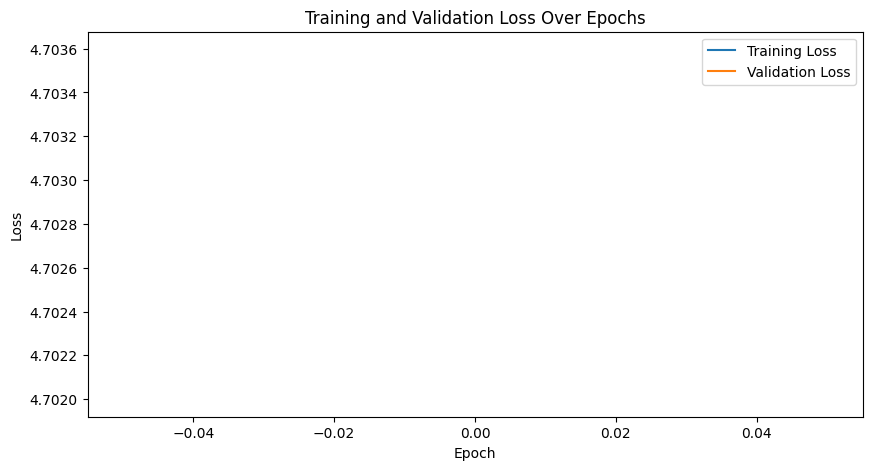

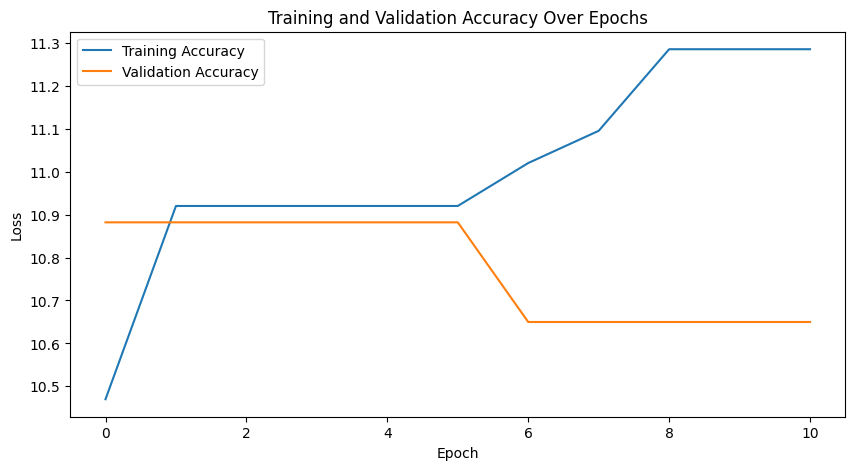

Extracting Embeddings: 100%|██████████| 485/485 [00:06<00:00, 69.79it/s]


Distance between embedding 6589 and 2885: 0.0031
Distance between embedding 6589 and 4016: 0.0037
Distance between embedding 6589 and 5862: 0.0039
Distance between embedding 6589 and 3761: 0.0016
Distance between embedding 6589 and 2201: 0.0011
Distance between embedding 6589 and 6468: 0.0009
Distance between embedding 6589 and 3726: 0.0013
Distance between embedding 6589 and 5161: 0.0011
Distance between embedding 6589 and 1572: 0.0013
Distance between embedding 6589 and 4632: 0.0019
Distance between embedding 6589 and 1639: 0.0010
Distance between embedding 6589 and 399: 0.0013
Distance between embedding 6589 and 1987: 0.0009
Distance between embedding 6589 and 7109: 0.0010
Distance between embedding 6589 and 5832: 0.0011
Distance between embedding 6589 and 6283: 0.0049
Distance between embedding 6589 and 6233: 0.0047
Distance between embedding 6589 and 354: 0.0022
Distance between embedding 6589 and 3924: 0.0028
Distance between embedding 2885 and 4016: 0.0023
Distance between embed

Testing: 100%|██████████| 485/485 [00:06<00:00, 75.06it/s]
/home/aref/.conda/envs/ml/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Test Accuracy: 10.88%
Test Precision: 0.01
Test Recall: 0.11
Test F1 Score: 0.02
Model saved to fmnist/resnet18/model_resnet18_fmnist_fold_1.pth
Finished training fold 1
Training fold 2/10...


Epoch 29/100:  29%|██▉       | 29/100 [12:49<31:24, 26.54s/it, val_loss=3.44, val_accuracy=63.5, train_loss=2.81, best_accuracy=66.8]


KeyboardInterrupt: 

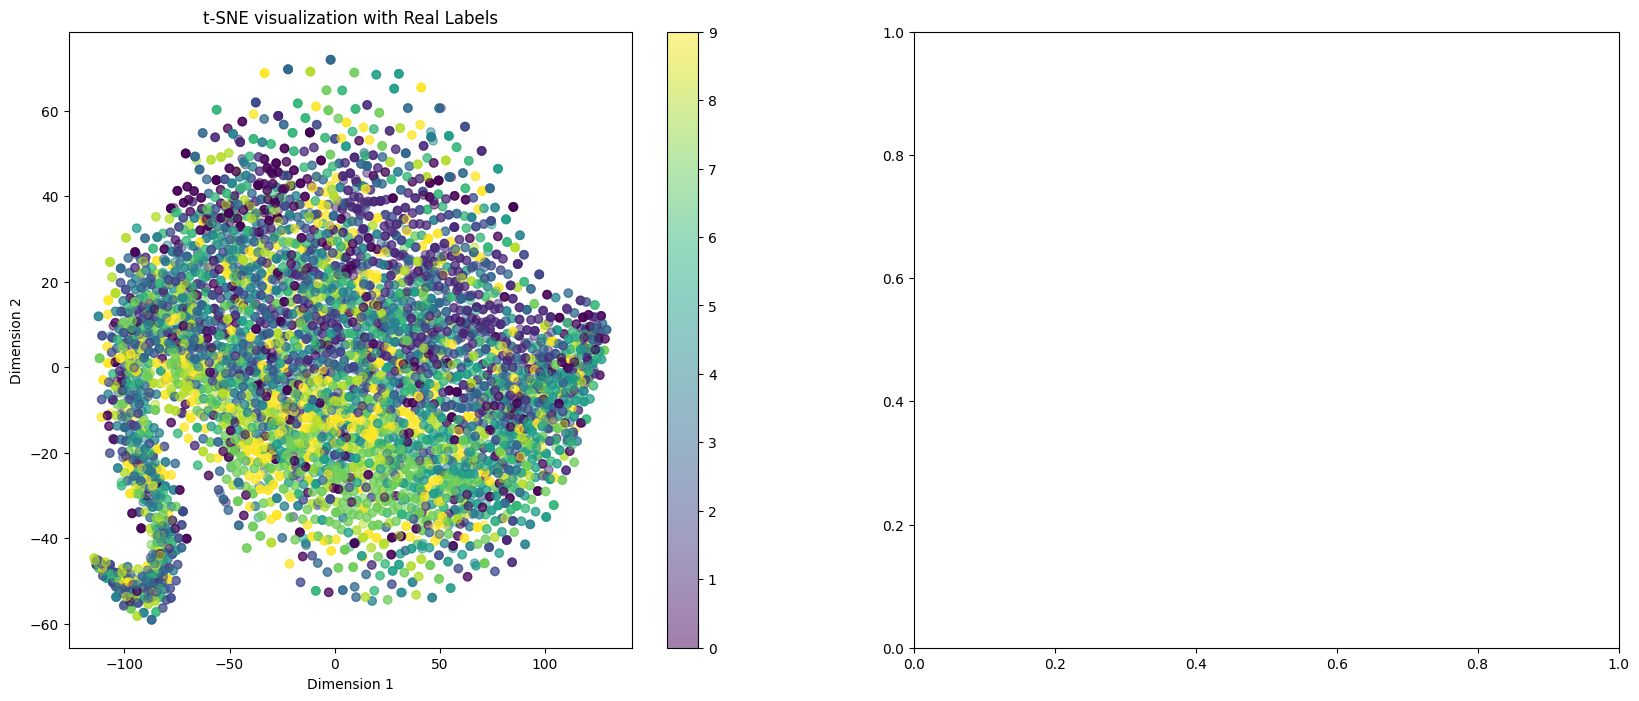

In [ ]:
noise_cleaner.clean()

In [ ]:
import models.predictor
import models
import importlib
importlib.reload(models)
from models import preact
importlib.reload(preact)
from models import predictor
importlib.reload(predictor)
from models.predictor import Predictor

In [ ]:
clean_train_dataset = noise_cleaner.clean_dataset
test_dataset = FashionMNIST(root='data', train=False, download=False)
predictor = Predictor(train_dataset=clean_train_dataset, test_dataset=test_dataset, transform=transform, num_classes=10, model_type='resnet18', batch_size=400)

In [ ]:
predictor.train(10)

Training Epoch 1/10: 100%|██████████| 113/113 [01:40<00:00,  1.12it/s]


Validation Accuracy: 93.46%
Epoch 1/10, Loss: 0.24129432162879844


Training Epoch 2/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 96.31%
Epoch 2/10, Loss: 0.12274887458940523


Training Epoch 3/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 97.07%
Epoch 3/10, Loss: 0.08064110191390578


Training Epoch 4/10: 100%|██████████| 113/113 [01:39<00:00,  1.14it/s]


Validation Accuracy: 96.81%
Epoch 4/10, Loss: 0.07340764353233101


Training Epoch 5/10: 100%|██████████| 113/113 [01:39<00:00,  1.14it/s]


Validation Accuracy: 96.51%
Epoch 5/10, Loss: 0.059963096196936294


Training Epoch 6/10: 100%|██████████| 113/113 [01:38<00:00,  1.15it/s]


Validation Accuracy: 97.89%
Epoch 6/10, Loss: 0.0528966288980657


Training Epoch 7/10: 100%|██████████| 113/113 [01:40<00:00,  1.13it/s]


Validation Accuracy: 97.85%
Epoch 7/10, Loss: 0.03885995962582858


Training Epoch 8/10: 100%|██████████| 113/113 [01:40<00:00,  1.13it/s]


Validation Accuracy: 97.95%
Epoch 8/10, Loss: 0.03452066272760915


Training Epoch 9/10: 100%|██████████| 113/113 [01:40<00:00,  1.12it/s]


Validation Accuracy: 98.30%
Epoch 9/10, Loss: 0.030963845262551203


Training Epoch 10/10: 100%|██████████| 113/113 [01:39<00:00,  1.13it/s]


Validation Accuracy: 98.22%
Epoch 10/10, Loss: 0.02610123477282777


In [ ]:
predictor.evaluate()

Evaluating: 100%|██████████| 25/25 [00:11<00:00,  2.25it/s]

Test Accuracy: 90.21%


0.9021

## CIFAR 10 - 20

In [ ]:
train_dataset = CIFAR10(root='data', train=True, download=True)
transform = transforms.Compose([
                                # transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),        # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar10/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.2, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=5e-5, optimizer='Adam', patience=8, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar10/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Files already downloaded and verified
Seed: 51
noise count: 10208 out of 50000 data


In [3]:
noise_cleaner.save_noisy_dataset('cleaned', 'dirty')

100%|██████████| 50000/50000 [00:03<00:00, 12964.02it/s]

Noisy dataset saved to cleaned/dirty.pkl


In [5]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
80.21077283372365% accuracy in 854 data
Loaded 854 noisy indices from cifar10/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
79.53488372093022% accuracy in 860 data
Loaded 860 noisy indices from cifar10/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
78.55504587155964% accuracy in 872 data
Loaded 872 noisy indices from cifar10/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
80.02466091245375% accuracy in 811 data
Loaded 811 noisy indices from cifar10/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
80.62770562770562% accuracy in 924 data
Loaded 924 noisy indices from cifar10/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
77.0011273957159% accuracy in 887 data
Loaded 887 noisy indices from cifar10/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
79.57992998833139% accuracy in 857 data
Loaded 857 noisy indices from cifar10/resne

              precision    recall  f1-score   support

       Clean     0.9569    0.9248    0.9406     39792
       Noisy     0.7408    0.8375    0.7862     10208

    accuracy                         0.9070     50000
   macro avg     0.8488    0.8811    0.8634     50000
weighted avg     0.9127    0.9070    0.9090     50000



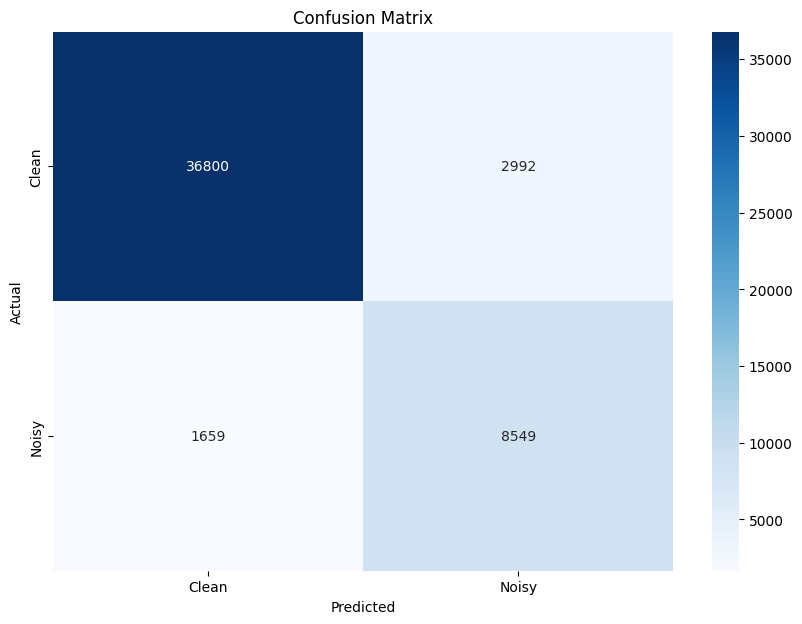

In [9]:
noise_cleaner.report(mistakes_count=9)

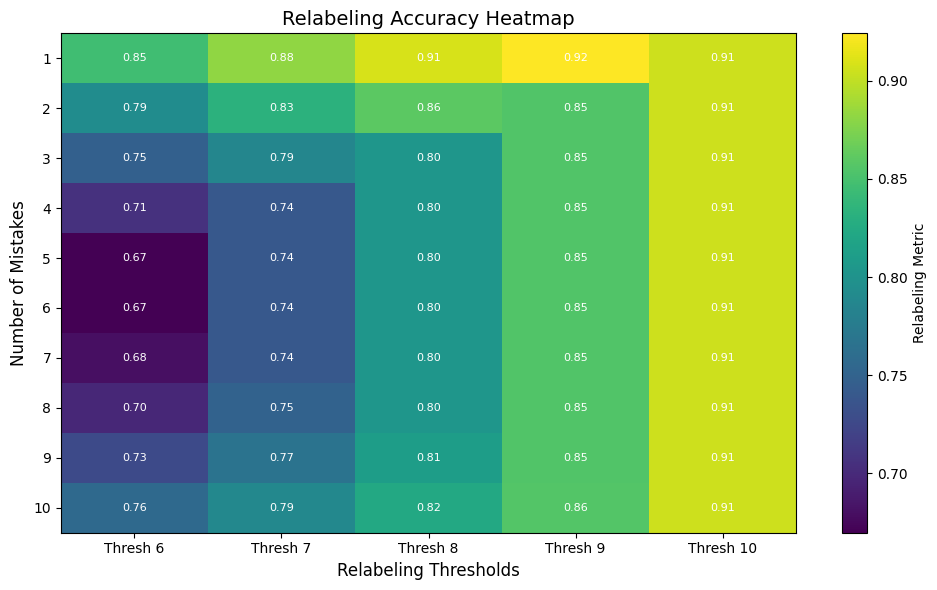

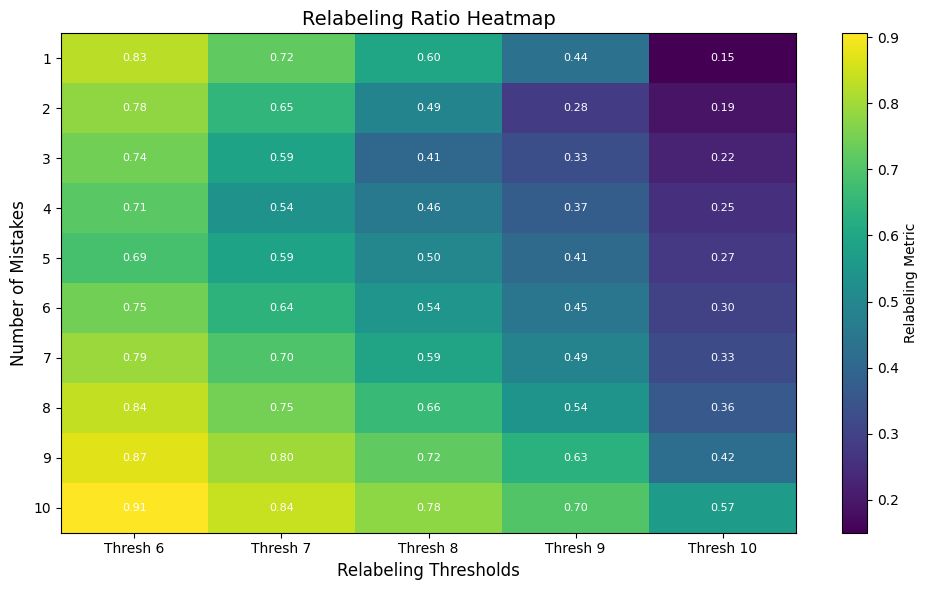

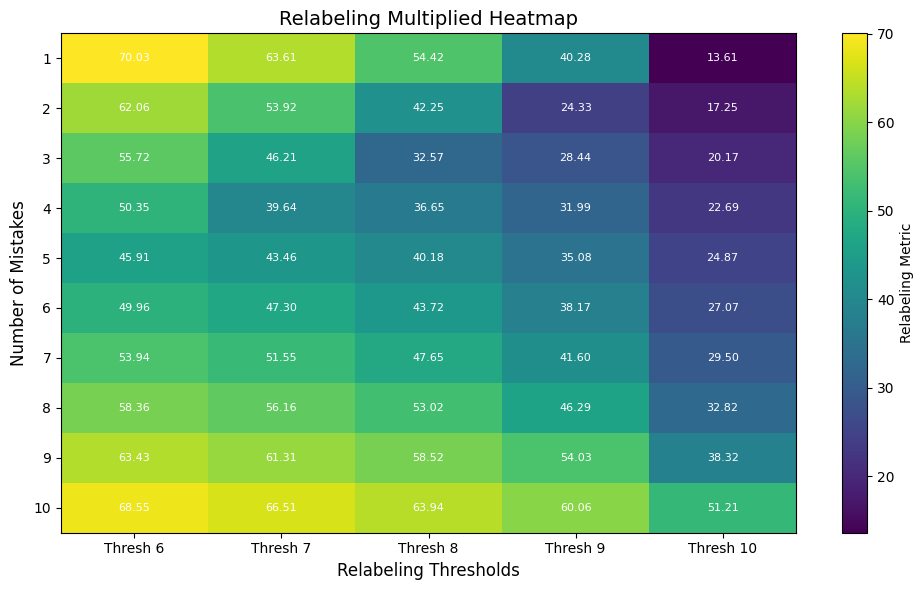

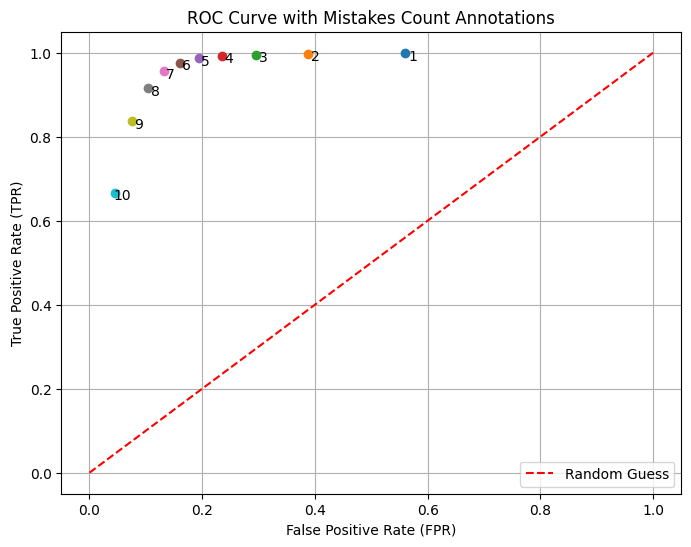

Area Under the Curve (AUC): 0.49907322987450103


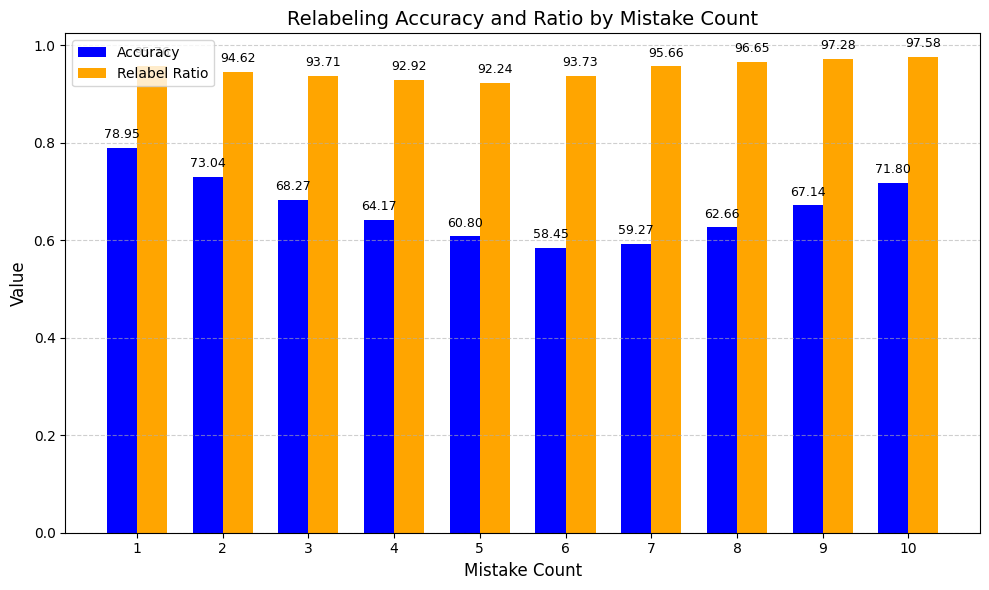

In [4]:
noise_cleaner.analyze()

Files already downloaded and verified
              precision    recall  f1-score   support

       Clean     0.9569    0.9248    0.9406     39792
       Noisy     0.7408    0.8375    0.7862     10208

    accuracy                         0.9070     50000
   macro avg     0.8488    0.8811    0.8634     50000
weighted avg     0.9127    0.9070    0.9090     50000



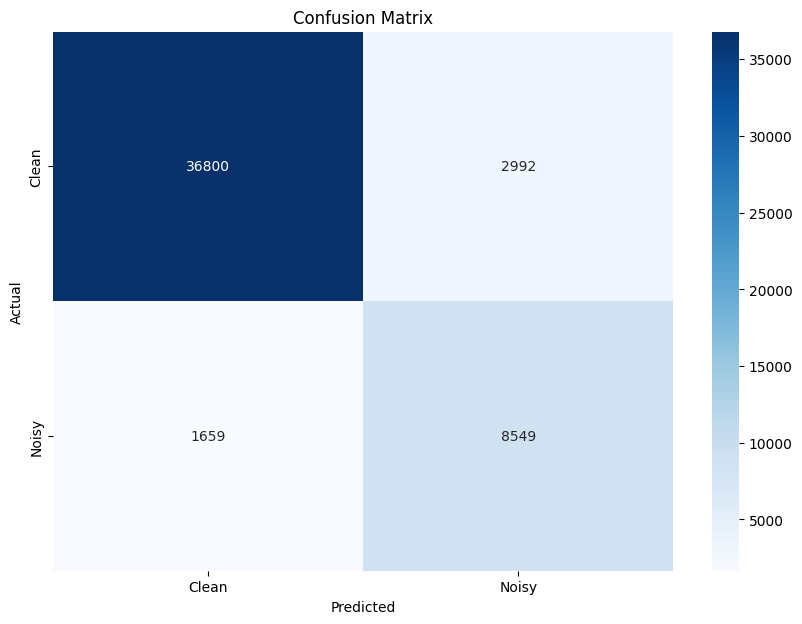

              precision    recall  f1-score   support

       Clean     0.8577    0.9343    0.8944     39792
       Noisy     0.6074    0.3960    0.4794     10208

    accuracy                         0.8244     50000
   macro avg     0.7326    0.6651    0.6869     50000
weighted avg     0.8066    0.8244    0.8097     50000



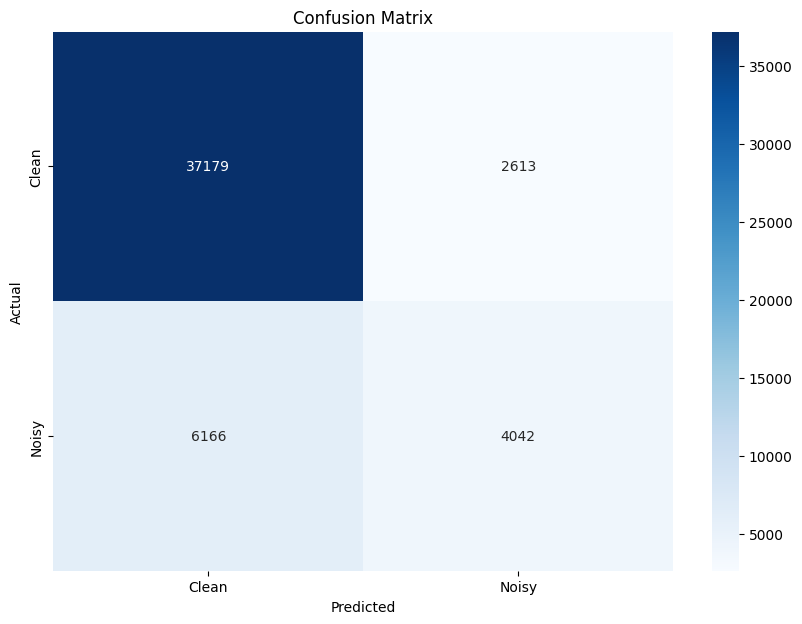

6655 removed from dataset and 4886 relabled
4.90% noise remained in 43345 data


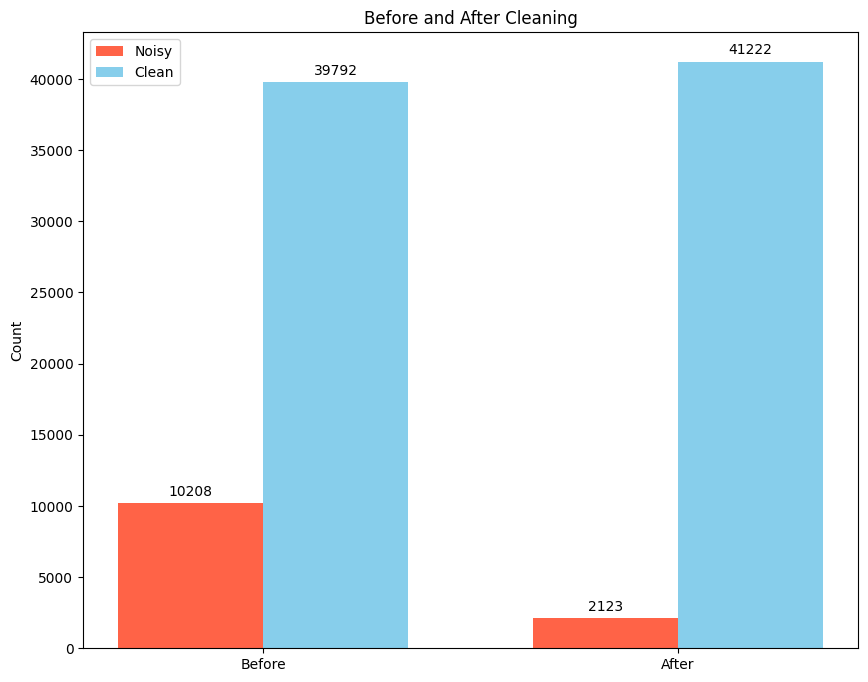

100%|██████████| 43345/43345 [05:45<00:00, 125.37it/s] 


Cleaned dataset saved to cleaned/Advanced-CIFAR10.pkl


In [4]:
dataset = CIFAR10(root='data', train=True, download=True)
manual_cleaned = noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=9, relabel_threshold=10)
noise_cleaner.save_cleaned_cifar_dataset_manual(manual_cleaned, 'cleaned', 'Advanced-CIFAR10')

In [6]:
noise_cleaner.save_cleaned_cifar_dataset('cleaned', 'CIFAR10')

100%|██████████| 41150/41150 [00:01<00:00, 21517.98it/s]

Cleaned dataset saved to cleaned/CIFAR10.pkl


## CIFAR10 - 30

In [2]:
train_dataset = CIFAR10(root='data', train=True, download=True)
transform = transforms.Compose([
                                # transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),        # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar10(30)/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.3, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=5e-5, optimizer='Adam', patience=10, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10(30)/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar10(30)/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Files already downloaded and verified
Seed: 51
noise count: 14976 out of 50000 data


In [3]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
72.09847596717468% accuracy in 853 data
Loaded 853 noisy indices from cifar10(30)/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
74.22434367541766% accuracy in 838 data
Loaded 838 noisy indices from cifar10(30)/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
74.74048442906575% accuracy in 867 data
Loaded 867 noisy indices from cifar10(30)/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
78.2668500687758% accuracy in 727 data
Loaded 727 noisy indices from cifar10(30)/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
74.47306791569088% accuracy in 854 data
Loaded 854 noisy indices from cifar10(30)/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
77.1604938271605% accuracy in 810 data
Loaded 810 noisy indices from cifar10(30)/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
76.58371040723982% accuracy in 884 data
Loaded 884 noisy ind

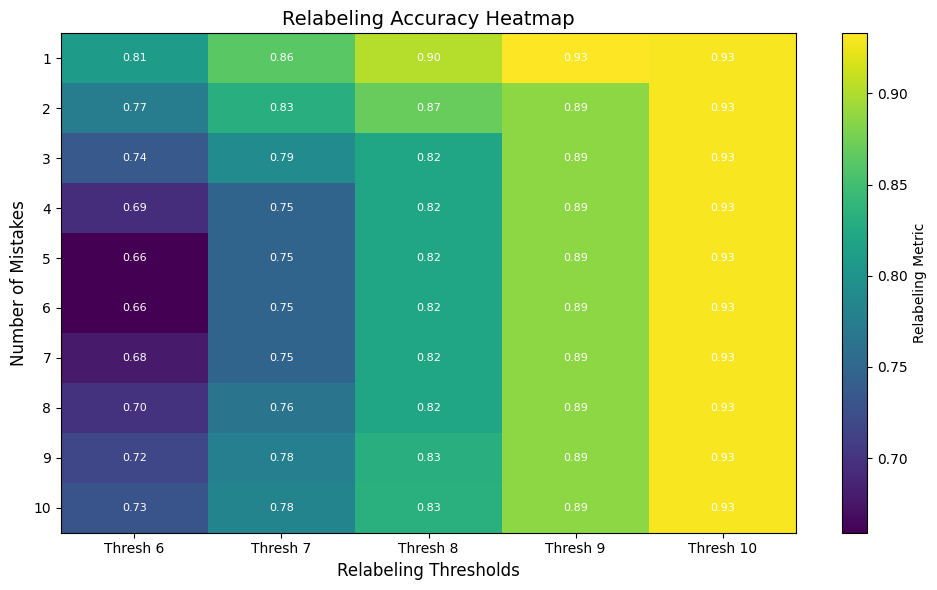

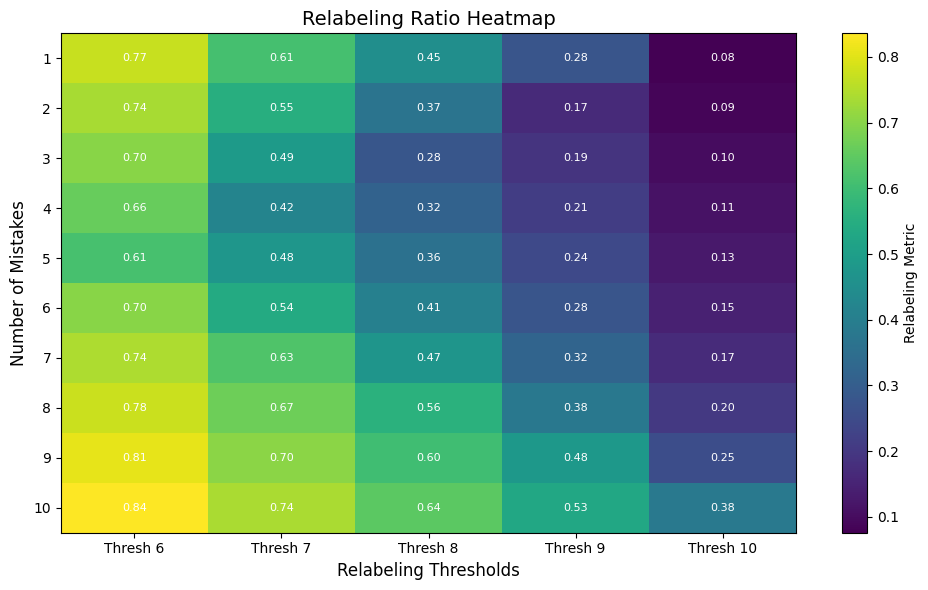

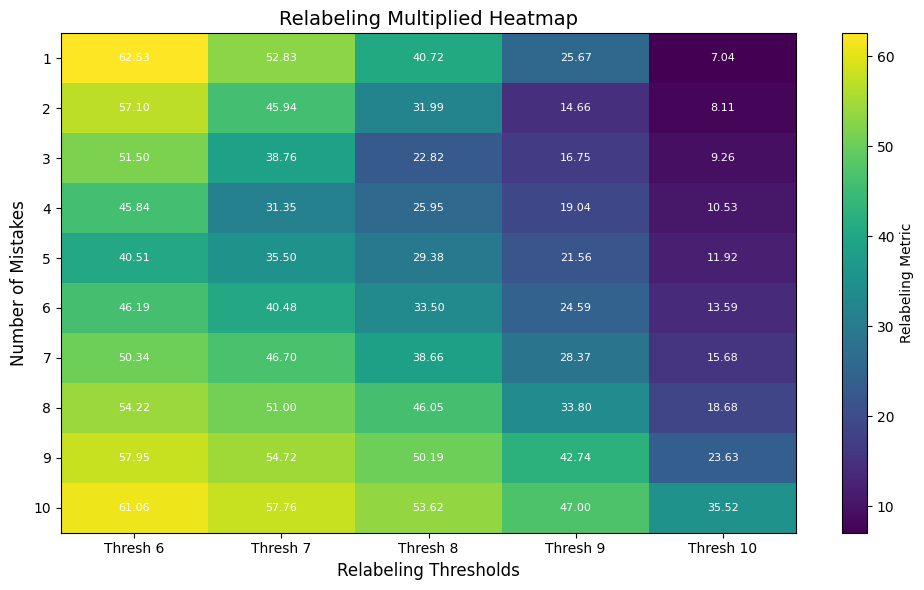

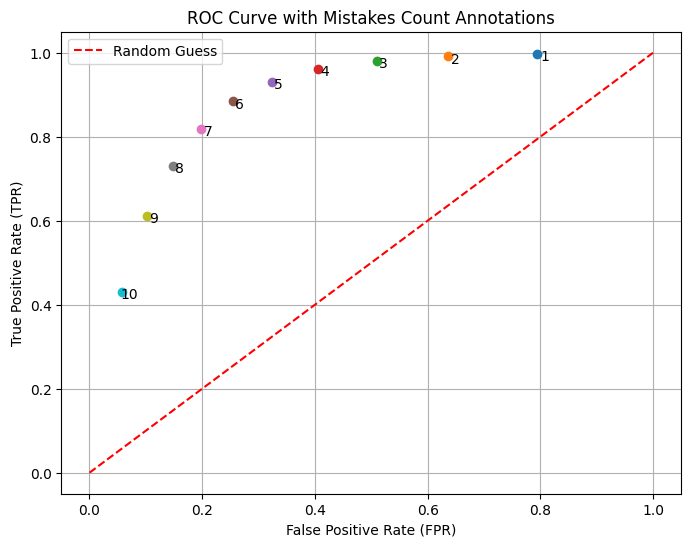

Area Under the Curve (AUC): 0.6646810900562569


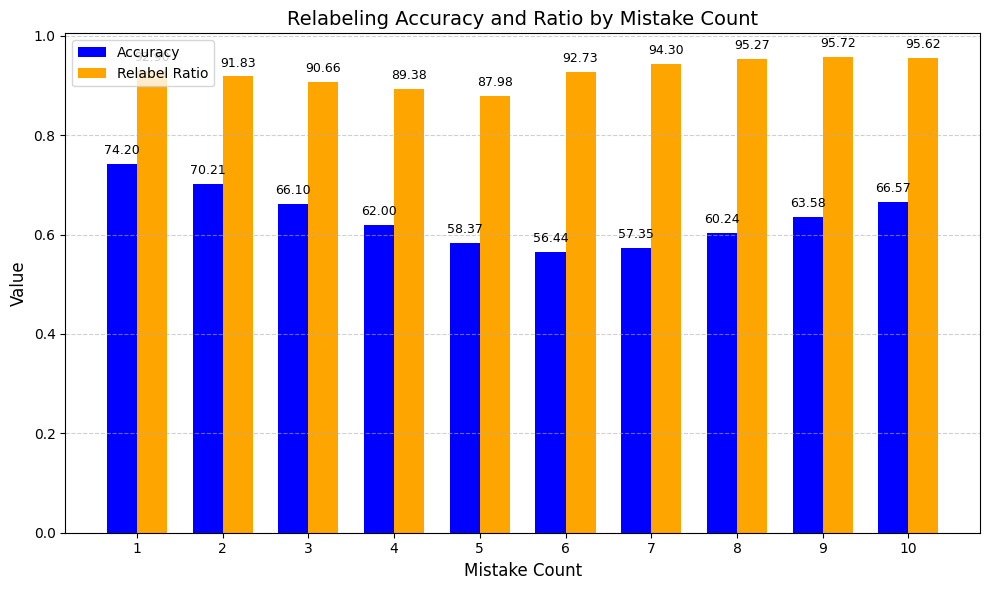

In [4]:
noise_cleaner.analyze()

Files already downloaded and verified
              precision    recall  f1-score   support

       Clean     0.9119    0.8018    0.8533     35024
       Noisy     0.6386    0.8188    0.7176     14976

    accuracy                         0.8069     50000
   macro avg     0.7752    0.8103    0.7854     50000
weighted avg     0.8300    0.8069    0.8127     50000



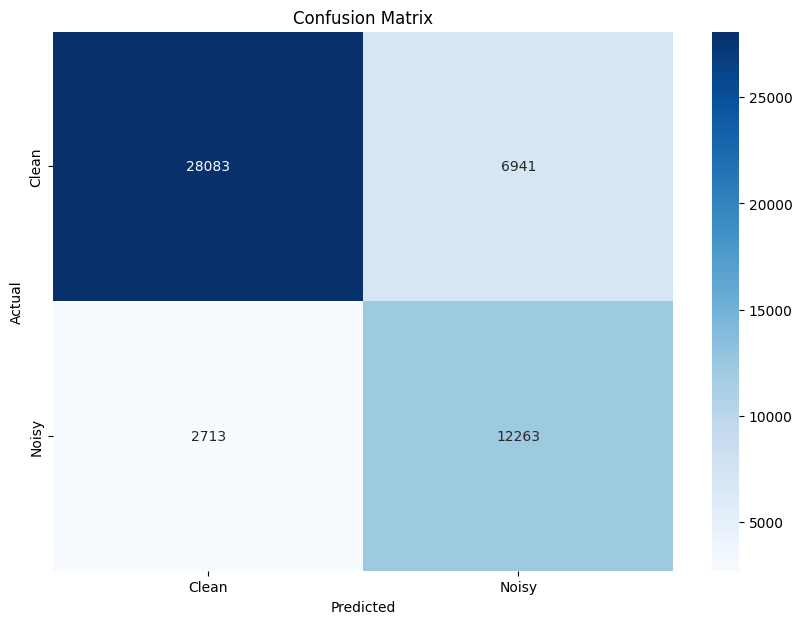

              precision    recall  f1-score   support

       Clean     0.7380    0.8395    0.7855     35024
       Noisy     0.4467    0.3030    0.3610     14976

    accuracy                         0.6788     50000
   macro avg     0.5923    0.5712    0.5733     50000
weighted avg     0.6507    0.6788    0.6584     50000



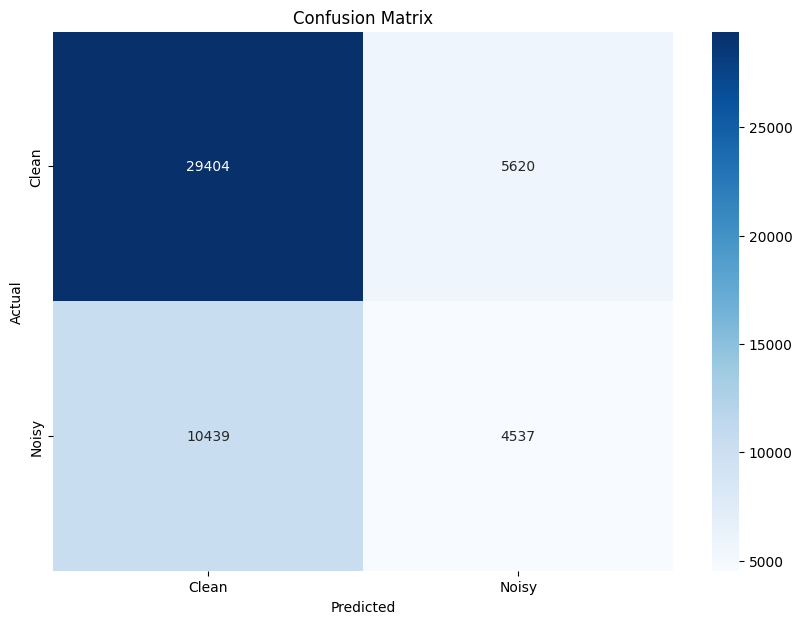

10157 removed from dataset and 9047 relabled
10.88% noise remained in 39843 data


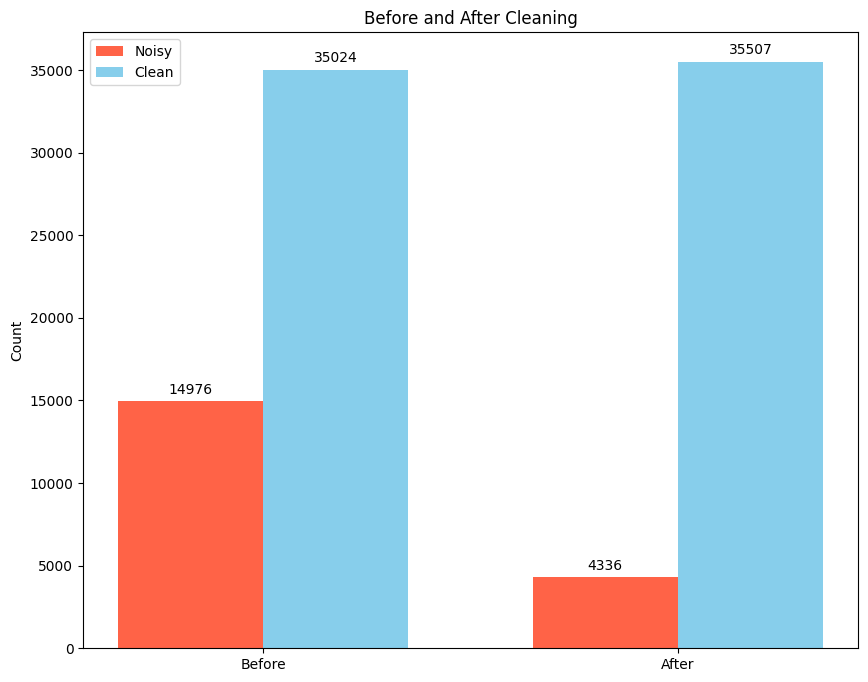

100%|██████████| 39843/39843 [00:01<00:00, 20965.34it/s]

Cleaned dataset saved to cleaned/Advanced-CIFAR10-30.pkl


In [ ]:
dataset = CIFAR10(root='data', train=True, download=True)
manual_cleaned = noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=7, relabel_threshold=8)
noise_cleaner.save_cleaned_cifar_dataset_manual(manual_cleaned, 'cleaned', 'Advanced-CIFAR10-30')

## CIFAR10 - 40

In [2]:
train_dataset = CIFAR10(root='data', train=True, download=True)
transform = transforms.Compose([
                                # transforms.Grayscale(num_output_channels=3),
                                transforms.ToTensor(),
                                transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomRotation(degrees=15),        # Random rotation within 15 degrees
    transforms.RandomHorizontalFlip(p=0.5),      # Random horizontal flip
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)), # Width and height shift
    transforms.RandomResizedCrop(size=32, scale=(0.9, 1.0)),  # Zoom-like effect
    transforms.ToTensor(),                        # Convert images to PyTorch tensors
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)) # Normalize
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar10(40)/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=10, outer_folds_num=10, model='resnet50', train_noise_level=0.4, epochs_num=1000, train_pairs=200000, 
                             val_pairs=20000, embedding_dimension=64, lr=5e-5, optimizer='Adam', patience=15, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.5, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=new_augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=2, freeze_epoch=None, noisy_indices_path='cifar10(40)/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar10(40)/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11))

Files already downloaded and verified
Seed: 51
noise count: 19803 out of 50000 data


In [3]:
noise_cleaner.clean()

Skipping outer fold 1 with results:
70.13729977116705% accuracy in 874 data
Loaded 874 noisy indices from cifar10(40)/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
63.282937365010795% accuracy in 926 data
Loaded 926 noisy indices from cifar10(40)/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
69.01408450704226% accuracy in 923 data
Loaded 923 noisy indices from cifar10(40)/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
71.32947976878613% accuracy in 865 data
Loaded 865 noisy indices from cifar10(40)/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
67.70114942528735% accuracy in 870 data
Loaded 870 noisy indices from cifar10(40)/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
63.24884792626728% accuracy in 868 data
Loaded 868 noisy indices from cifar10(40)/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
68.40148698884758% accuracy in 807 data
Loaded 807 noisy 

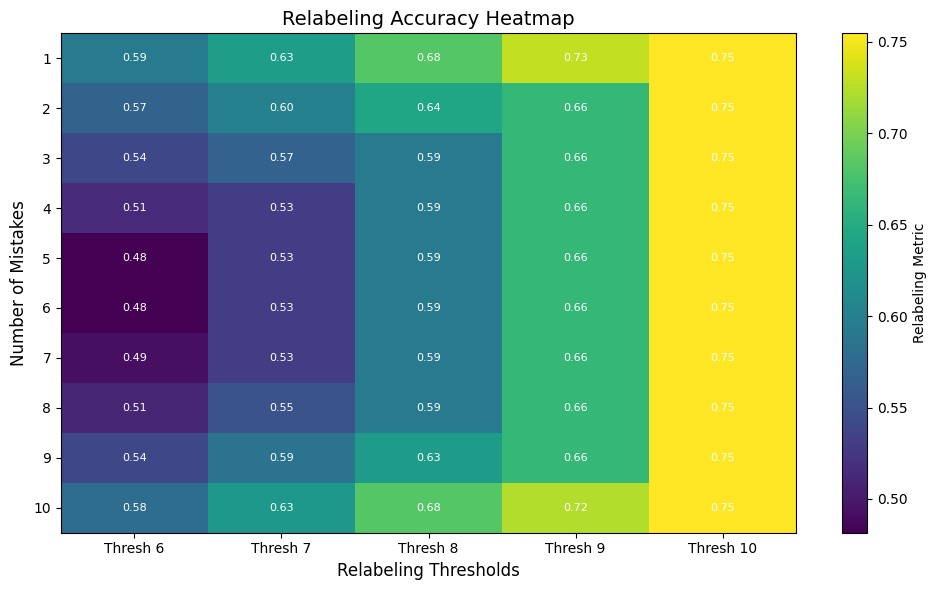

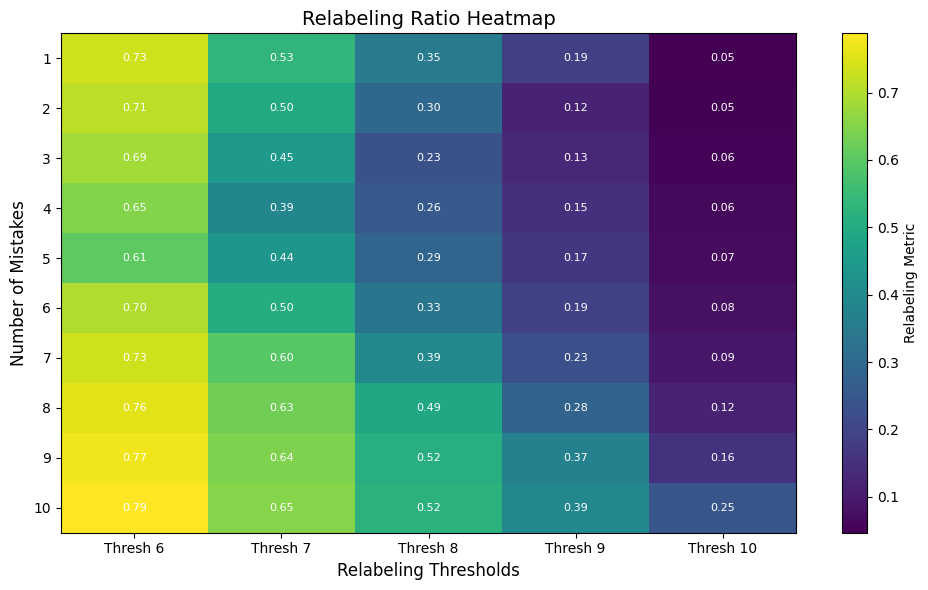

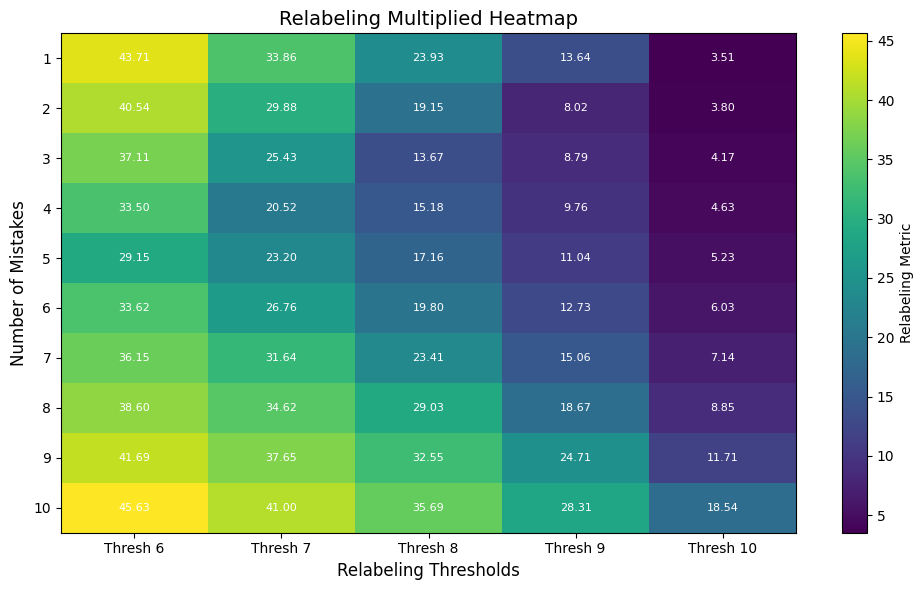

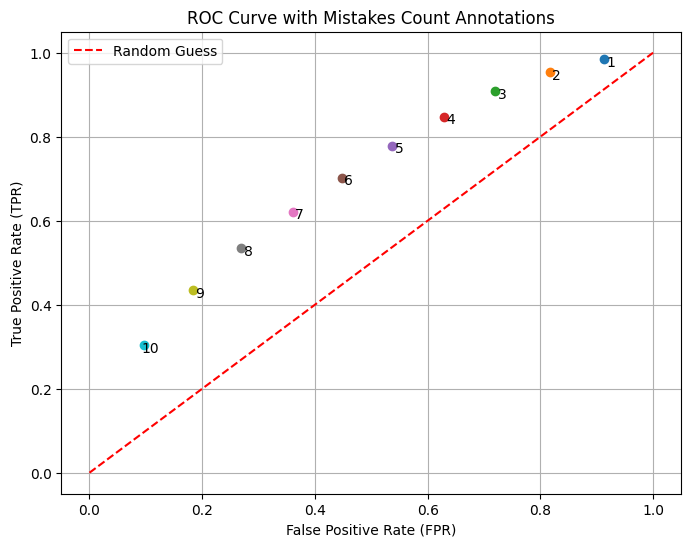

Area Under the Curve (AUC): 0.589056895488616


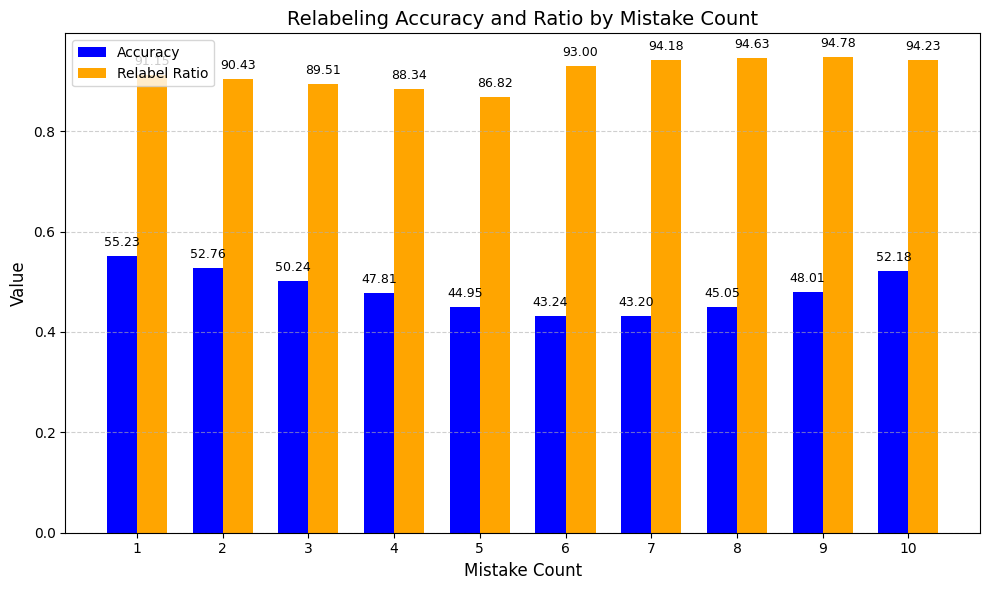

In [4]:
noise_cleaner.analyze()

Files already downloaded and verified
              precision    recall  f1-score   support

       Clean     0.7206    0.6397    0.6777     30197
       Noisy     0.5309    0.6217    0.5727     19803

    accuracy                         0.6326     50000
   macro avg     0.6257    0.6307    0.6252     50000
weighted avg     0.6454    0.6326    0.6361     50000



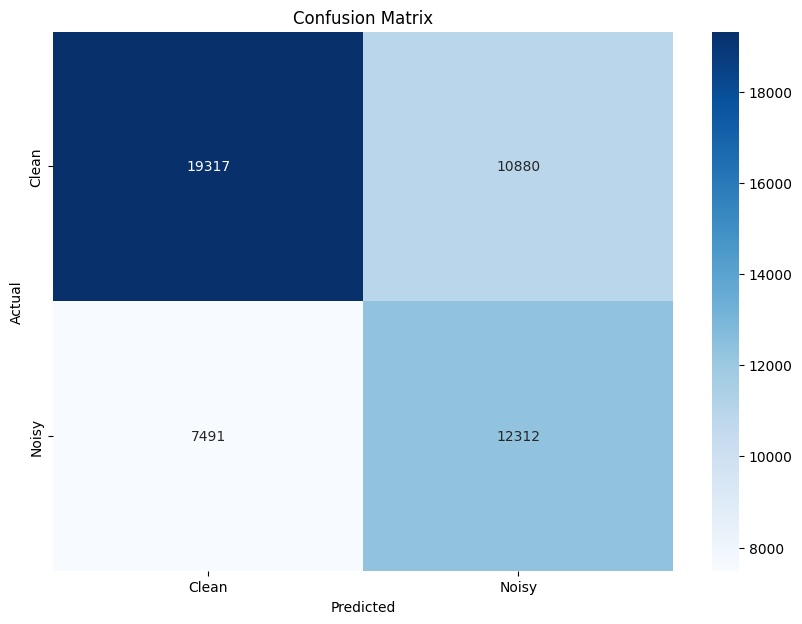

              precision    recall  f1-score   support

       Clean     0.6524    0.6929    0.6720     30197
       Noisy     0.4827    0.4371    0.4588     19803

    accuracy                         0.5916     50000
   macro avg     0.5676    0.5650    0.5654     50000
weighted avg     0.5852    0.5916    0.5876     50000



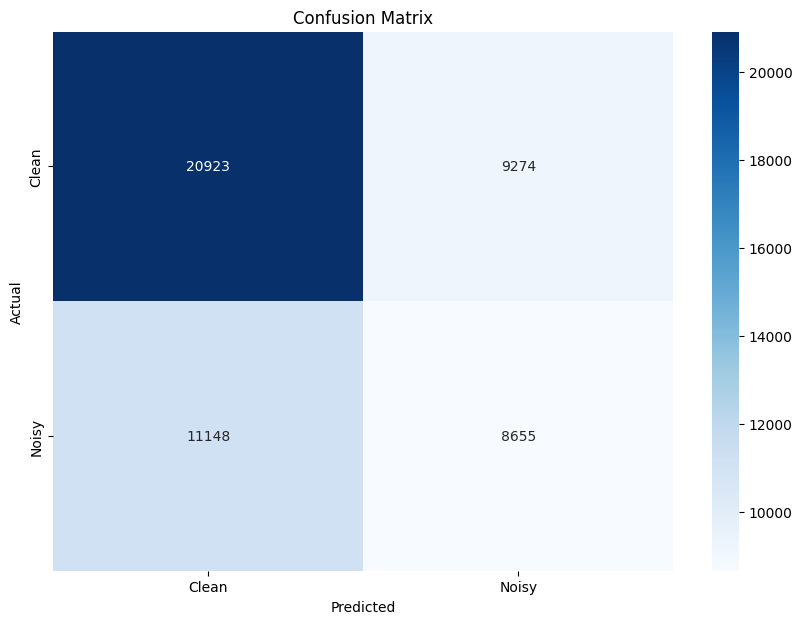

17929 removed from dataset and 5263 relabled
28.88% noise remained in 32071 data


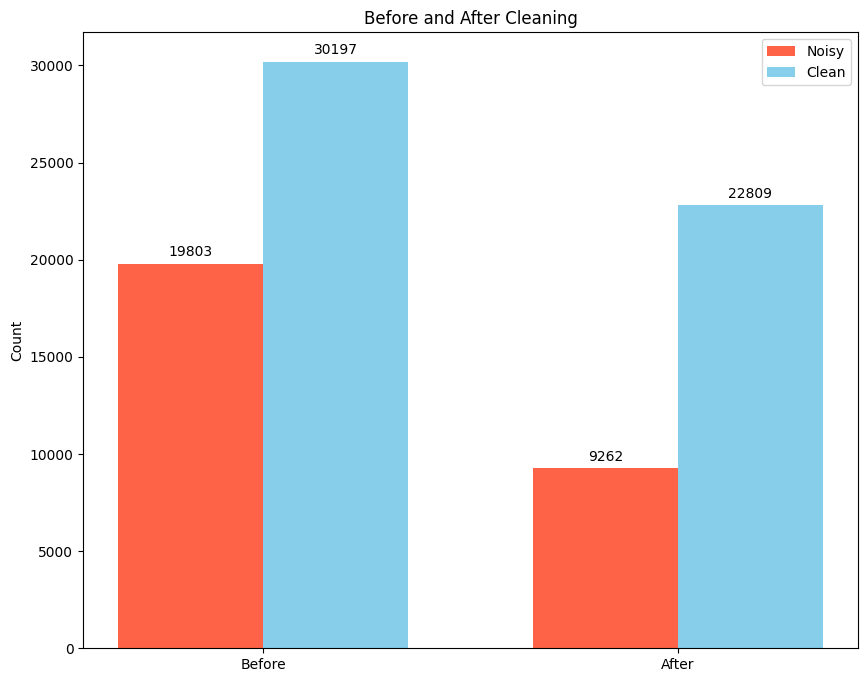

100%|██████████| 32071/32071 [00:01<00:00, 20518.49it/s]

Cleaned dataset saved to cleaned/Advanced-CIFAR10-40.pkl


In [9]:
dataset = CIFAR10(root='data', train=True, download=True)
manual_cleaned = noise_cleaner.advanced_clean(dataset=dataset, mistakes_count=7, relabel_threshold=9)
noise_cleaner.save_cleaned_cifar_dataset_manual(manual_cleaned, 'cleaned', 'Advanced-CIFAR10-40')

## CIFAR 100 - 20

In [3]:
train_dataset = CIFAR100(root='data', train=True, download=True)
transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5071, 0.4865, 0.4409], std=[0.2673, 0.2564, 0.2762])])

augmented_transform = transforms.Compose([
    transforms.RandomCrop(size=32, padding=4),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4865, 0.4409], std=[0.2673, 0.2564, 0.2762])
])

new_augmented_transform = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1), # Optional
    transforms.RandAugment(num_ops=2, magnitude=9),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4865, 0.4409], std=[0.2673, 0.2564, 0.2762])
])

noise_cleaner = NoiseCleaner(train_dataset, noise_type='idn', model_save_path="cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_{}.pth", 
                             inner_folds_num=15, outer_folds_num=15, model='resnet50', train_noise_level=0.2, epochs_num=1000, train_pairs=300000, 
                             val_pairs=30000, embedding_dimension=128, lr=5e-5, optimizer='Adam', patience=15, transform=transform,
                             weight_decay=5e-4, training_batch_size=2048, pre_trained=True, dropout_prob=0.4, contrastive_ratio=1,
                             distance_meter='euclidian', augmented_transform=new_augmented_transform, trainable=True, pair_validation=False,
                             label_smoothing=0.1, loss='ce', margin=4, freeze_epoch=None, noisy_indices_path='cifar100(128)(20)/resnet50/fold{}_noisy_indices.csv',
                             prediction_path='cifar100(128)(20)/resnet50/fold{}_analysis.csv', mistakes_count=10, relabeling_range=range(6, 11),
                             num_class=100, siamese_middle_size=100)

Files already downloaded and verified
Seed: 51


/home/aref/projects/SiameseNoiseDetection/models/predefined.py:89: UserWarning: Attempting to use hipBLASLt on an unsupported architecture! Overriding blas backend to hipblas (Triggered internally at /build/python-pytorch/src/pytorch-rocm/aten/src/ATen/Context.cpp:310.)
  A = x.contiguous().view(1, -1).mm(W[int(y)]).squeeze(0)


noise count: 10216 out of 50000 data


Skipping outer fold 1 with results:
43.688037012557835% accuracy in 1513 data
Loaded 1513 noisy indices from cifar100(128)(20)/resnet50/fold1_noisy_indices.csv
Skipping outer fold 2 with results:
42.885245901639344% accuracy in 1525 data
Loaded 1525 noisy indices from cifar100(128)(20)/resnet50/fold2_noisy_indices.csv
Skipping outer fold 3 with results:
45.39473684210527% accuracy in 1520 data
Loaded 1520 noisy indices from cifar100(128)(20)/resnet50/fold3_noisy_indices.csv
Skipping outer fold 4 with results:
45.38866930171278% accuracy in 1518 data
Loaded 1518 noisy indices from cifar100(128)(20)/resnet50/fold4_noisy_indices.csv
Skipping outer fold 5 with results:
44.45955132562883% accuracy in 1471 data
Loaded 1471 noisy indices from cifar100(128)(20)/resnet50/fold5_noisy_indices.csv
Skipping outer fold 6 with results:
45.08361204013378% accuracy in 1495 data
Loaded 1495 noisy indices from cifar100(128)(20)/resnet50/fold6_noisy_indices.csv
Skipping outer fold 7 with results:
44.06887

Epoch 42/1000:   4%|▍         | 43/1000 [1:55:43<42:55:28, 161.47s/it, val_loss=10.3, val_contrastive=4.58, val_accuracy=49, train_loss=7.87, train_contrastive=4.58, best_accuracy=51.6, best_loss=10.3]  


Early stopping triggered
Loading best model from checkpoint...


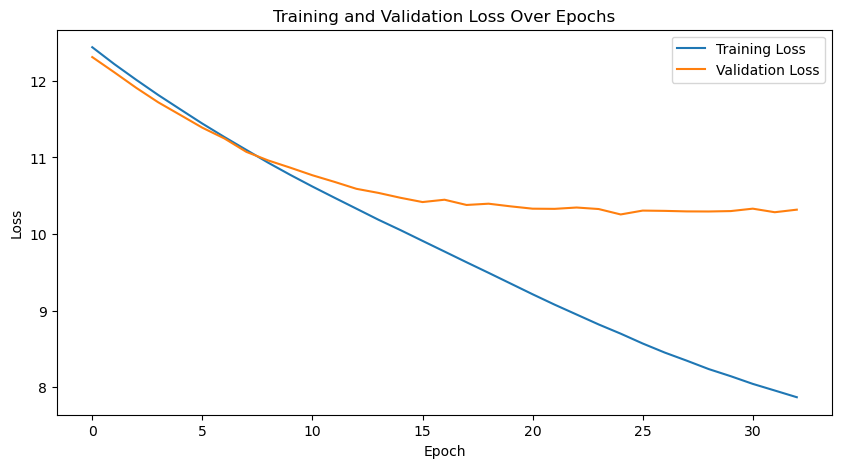

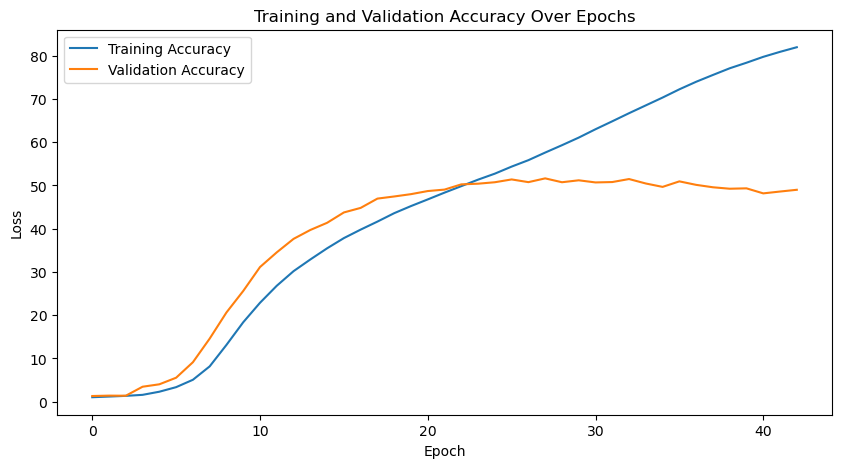

Extracting Embeddings: 100%|██████████| 35/35 [00:01<00:00, 19.68it/s]


Distance between embedding 3225 and 1622: 2.1961
Distance between embedding 3225 and 2261: 2.5727
Distance between embedding 3225 and 2143: 2.4270
Distance between embedding 3225 and 3227: 2.4614
Distance between embedding 3225 and 2449: 2.2070
Distance between embedding 3225 and 881: 2.6292
Distance between embedding 3225 and 27: 2.2537
Distance between embedding 3225 and 2440: 2.2356
Distance between embedding 3225 and 3833: 2.6328
Distance between embedding 3225 and 1108: 2.3345
Distance between embedding 3225 and 3370: 2.3736
Distance between embedding 3225 and 2698: 2.3746
Distance between embedding 3225 and 4338: 2.5583
Distance between embedding 3225 and 219: 2.1117
Distance between embedding 3225 and 1064: 2.7357
Distance between embedding 3225 and 3021: 2.3137
Distance between embedding 3225 and 1037: 2.5659
Distance between embedding 3225 and 578: 2.3780
Distance between embedding 3225 and 894: 2.3464
Distance between embedding 1622 and 2261: 1.9025
Distance between embedding

Testing: 100%|██████████| 35/35 [00:01<00:00, 22.65it/s]


Test Accuracy: 51.63%
Test Precision: 0.52
Test Recall: 0.52
Test F1 Score: 0.51
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/15...


Epoch 46/1000:   5%|▍         | 47/1000 [2:00:14<40:38:04, 153.50s/it, val_loss=10.4, val_contrastive=4.48, val_accuracy=45.8, train_loss=7.5, train_contrastive=4.51, best_accuracy=49.5, best_loss=10.4] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:02<00:00, 15.64it/s]


Test Accuracy: 49.49%
Test Precision: 0.50
Test Recall: 0.49
Test F1 Score: 0.49
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/15...


Epoch 47/1000:   5%|▍         | 48/1000 [2:03:39<40:52:31, 154.57s/it, val_loss=10.3, val_contrastive=4.41, val_accuracy=47.1, train_loss=7.37, train_contrastive=4.47, best_accuracy=50, best_loss=10.3]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:02<00:00, 12.37it/s]


Test Accuracy: 49.96%
Test Precision: 0.51
Test Recall: 0.50
Test F1 Score: 0.49
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/15...


Epoch 52/1000:   5%|▌         | 53/1000 [2:16:42<40:42:46, 154.77s/it, val_loss=10.4, val_contrastive=4.37, val_accuracy=45.9, train_loss=7.2, train_contrastive=4.4, best_accuracy=48.9, best_loss=10.4]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:02<00:00, 12.25it/s]


Test Accuracy: 48.88%
Test Precision: 0.49
Test Recall: 0.49
Test F1 Score: 0.49
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/15...


Epoch 42/1000:   4%|▍         | 43/1000 [1:51:15<41:16:16, 155.25s/it, val_loss=10.4, val_contrastive=4.47, val_accuracy=46.3, train_loss=7.73, train_contrastive=4.55, best_accuracy=49.4, best_loss=10.3]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:02<00:00, 12.07it/s]


Test Accuracy: 49.44%
Test Precision: 0.50
Test Recall: 0.49
Test F1 Score: 0.49
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/15...


Epoch 48/1000:   5%|▍         | 49/1000 [2:06:33<40:56:14, 154.97s/it, val_loss=10.4, val_contrastive=4.45, val_accuracy=47.4, train_loss=7.55, train_contrastive=4.5, best_accuracy=50, best_loss=10.4]   


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:03<00:00, 11.37it/s]


Test Accuracy: 50.02%
Test Precision: 0.51
Test Recall: 0.50
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/15...


Epoch 44/1000:   4%|▍         | 45/1000 [1:56:27<41:11:36, 155.28s/it, val_loss=10.4, val_contrastive=4.49, val_accuracy=47.2, train_loss=7.6, train_contrastive=4.52, best_accuracy=50.6, best_loss=10.3] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:03<00:00, 11.54it/s]


Test Accuracy: 50.63%
Test Precision: 0.52
Test Recall: 0.51
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/15...


Epoch 44/1000:   4%|▍         | 45/1000 [1:56:29<41:12:12, 155.32s/it, val_loss=10.2, val_contrastive=4.51, val_accuracy=50.3, train_loss=7.76, train_contrastive=4.56, best_accuracy=52.6, best_loss=10.1]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:03<00:00, 11.32it/s]


Test Accuracy: 52.60%
Test Precision: 0.53
Test Recall: 0.53
Test F1 Score: 0.52
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/15...


Epoch 44/1000:   4%|▍         | 45/1000 [1:56:26<41:11:04, 155.25s/it, val_loss=10.3, val_contrastive=4.45, val_accuracy=47.8, train_loss=7.68, train_contrastive=4.53, best_accuracy=50.7, best_loss=10.2]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:03<00:00, 10.94it/s]


Test Accuracy: 50.69%
Test Precision: 0.51
Test Recall: 0.51
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/15...


Epoch 53/1000:   5%|▌         | 54/1000 [2:19:57<40:51:58, 155.52s/it, val_loss=10.5, val_contrastive=4.49, val_accuracy=46, train_loss=7.23, train_contrastive=4.41, best_accuracy=49.8, best_loss=10.3]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:03<00:00, 11.15it/s]


Test Accuracy: 49.84%
Test Precision: 0.50
Test Recall: 0.50
Test F1 Score: 0.49
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_10.pth
Finished training fold 10
Training fold 11/15...


Epoch 41/1000:   4%|▍         | 42/1000 [1:48:43<41:20:07, 155.33s/it, val_loss=10.4, val_contrastive=4.56, val_accuracy=47, train_loss=8.01, train_contrastive=4.59, best_accuracy=48.6, best_loss=10.4]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:03<00:00, 11.29it/s]


Test Accuracy: 48.57%
Test Precision: 0.49
Test Recall: 0.49
Test F1 Score: 0.48
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_11.pth
Finished training fold 11
Training fold 12/15...


Epoch 42/1000:   4%|▍         | 43/1000 [1:51:25<41:19:51, 155.48s/it, val_loss=10.4, val_contrastive=4.53, val_accuracy=48, train_loss=7.77, train_contrastive=4.58, best_accuracy=51.1, best_loss=10.3]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:03<00:00, 11.21it/s]


Test Accuracy: 51.10%
Test Precision: 0.53
Test Recall: 0.51
Test F1 Score: 0.51
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_12.pth
Finished training fold 12
Training fold 13/15...


Epoch 42/1000:   4%|▍         | 43/1000 [1:51:25<41:19:41, 155.47s/it, val_loss=10.3, val_contrastive=4.56, val_accuracy=48.5, train_loss=7.74, train_contrastive=4.55, best_accuracy=52.3, best_loss=10.2]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:03<00:00, 11.09it/s]


Test Accuracy: 52.31%
Test Precision: 0.53
Test Recall: 0.52
Test F1 Score: 0.52
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_13.pth
Finished training fold 13
Training fold 14/15...


Epoch 38/1000:   4%|▍         | 39/1000 [1:41:16<41:35:28, 155.81s/it, val_loss=10.2, val_contrastive=4.53, val_accuracy=48.5, train_loss=7.97, train_contrastive=4.6, best_accuracy=51.7, best_loss=10.2] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:03<00:00, 10.87it/s]


Test Accuracy: 51.66%
Test Precision: 0.53
Test Recall: 0.52
Test F1 Score: 0.51
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_14.pth
Finished training fold 14
Training fold 15/15...


Epoch 43/1000:   4%|▍         | 44/1000 [1:54:12<41:21:22, 155.73s/it, val_loss=10.3, val_contrastive=4.57, val_accuracy=47.3, train_loss=8.1, train_contrastive=4.61, best_accuracy=50.8, best_loss=10.3] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:03<00:00, 10.62it/s]


Test Accuracy: 50.76%
Test Precision: 0.51
Test Recall: 0.51
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_15.pth
Finished training fold 15


Evaluating Noisy Samples: 100%|██████████| 15/15 [01:32<00:00,  6.15s/it]


35.064935064935064% relabeling accuracy


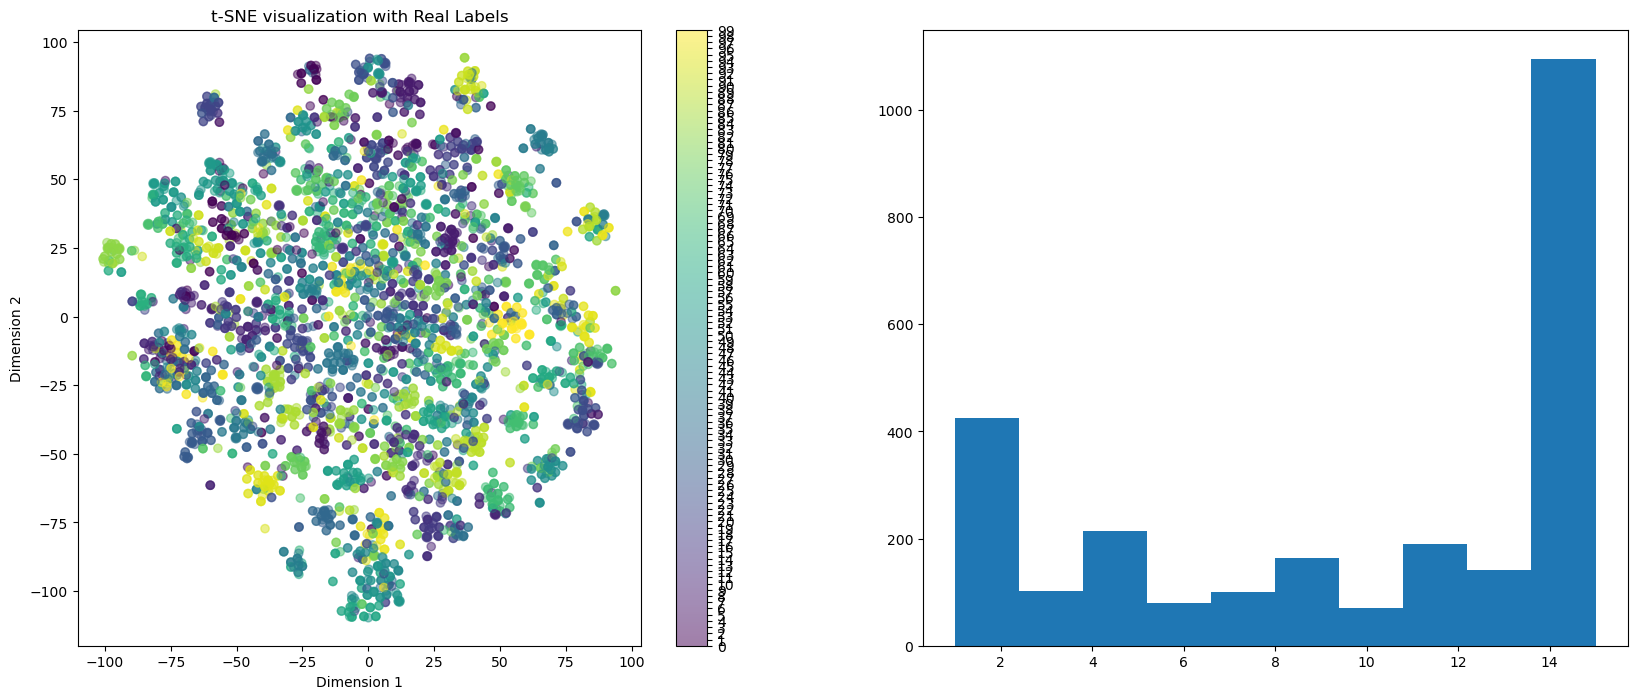

Predicted noise indices: [np.int64(36), np.int64(98), np.int64(116), np.int64(127), np.int64(162), np.int64(234), np.int64(236), np.int64(262), np.int64(269), np.int64(275), np.int64(294), np.int64(326), np.int64(364), np.int64(366), np.int64(367), np.int64(376), np.int64(392), np.int64(418), np.int64(448), np.int64(493), np.int64(563), np.int64(601), np.int64(662), np.int64(672), np.int64(708), np.int64(715), np.int64(752), np.int64(768), np.int64(772), np.int64(774), np.int64(793), np.int64(796), np.int64(848), np.int64(855), np.int64(916), np.int64(932), np.int64(982), np.int64(997), np.int64(1091), np.int64(1118), np.int64(1134), np.int64(1198), np.int64(1230), np.int64(1274), np.int64(1284), np.int64(1286), np.int64(1288), np.int64(1289), np.int64(1306), np.int64(1320), np.int64(1331), np.int64(1337), np.int64(1378), np.int64(1508), np.int64(1516), np.int64(1540), np.int64(1548), np.int64(1583), np.int64(1617), np.int64(1624), np.int64(1645), np.int64(1650), np.int64(1652), np.int

Epoch 50/1000:   5%|▌         | 51/1000 [2:13:19<41:20:58, 156.86s/it, val_loss=10.2, val_contrastive=4.47, val_accuracy=49.1, train_loss=7.32, train_contrastive=4.44, best_accuracy=51.7, best_loss=10.2]

Early stopping triggered
Loading best model from checkpoint...


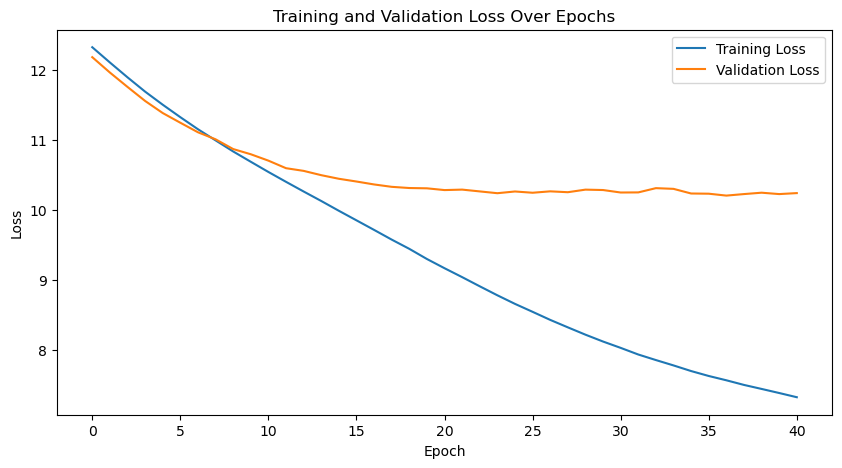

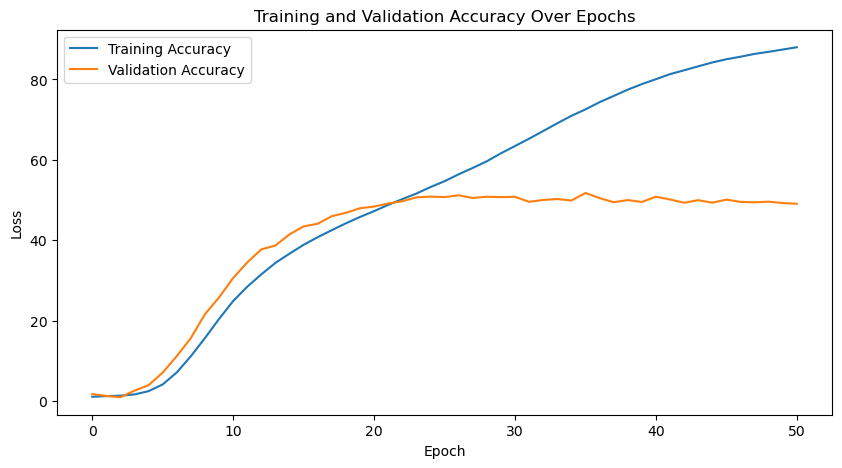

Extracting Embeddings: 100%|██████████| 35/35 [00:04<00:00,  8.51it/s]


Distance between embedding 1638 and 3810: 2.1580
Distance between embedding 1638 and 1425: 2.9426
Distance between embedding 1638 and 457: 2.8557
Distance between embedding 1638 and 1611: 2.7959
Distance between embedding 1638 and 3102: 2.1225
Distance between embedding 1638 and 1251: 2.5224
Distance between embedding 1638 and 4218: 2.5729
Distance between embedding 1638 and 4335: 2.4441
Distance between embedding 1638 and 4157: 2.5367
Distance between embedding 1638 and 2262: 2.1428
Distance between embedding 1638 and 2426: 2.5061
Distance between embedding 1638 and 2788: 2.6286
Distance between embedding 1638 and 2140: 2.2522
Distance between embedding 1638 and 955: 2.4181
Distance between embedding 1638 and 2562: 2.5485
Distance between embedding 1638 and 3633: 2.5001
Distance between embedding 1638 and 3899: 2.5083
Distance between embedding 1638 and 3703: 2.6661
Distance between embedding 1638 and 2199: 2.7666
Distance between embedding 3810 and 1425: 2.7052
Distance between embed

Testing: 100%|██████████| 35/35 [00:03<00:00,  9.28it/s]


Test Accuracy: 51.75%
Test Precision: 0.53
Test Recall: 0.52
Test F1 Score: 0.51
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/15...


Epoch 37/1000:   4%|▍         | 38/1000 [1:39:36<42:01:34, 157.27s/it, val_loss=10.3, val_contrastive=4.61, val_accuracy=48, train_loss=7.92, train_contrastive=4.59, best_accuracy=51.5, best_loss=10.2]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:04<00:00,  8.60it/s]


Test Accuracy: 51.50%
Test Precision: 0.53
Test Recall: 0.51
Test F1 Score: 0.51
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/15...


Epoch 40/1000:   4%|▍         | 41/1000 [1:47:55<42:04:19, 157.93s/it, val_loss=10.3, val_contrastive=4.53, val_accuracy=48.2, train_loss=7.86, train_contrastive=4.58, best_accuracy=52.3, best_loss=10.2]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:05<00:00,  6.91it/s]


Test Accuracy: 52.31%
Test Precision: 0.53
Test Recall: 0.52
Test F1 Score: 0.52
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/15...


Epoch 41/1000:   4%|▍         | 42/1000 [1:51:02<42:12:50, 158.63s/it, val_loss=10.4, val_contrastive=4.53, val_accuracy=46.6, train_loss=7.78, train_contrastive=4.55, best_accuracy=48.9, best_loss=10.3]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:04<00:00,  7.10it/s]


Test Accuracy: 48.93%
Test Precision: 0.50
Test Recall: 0.49
Test F1 Score: 0.49
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/15...


Epoch 42/1000:   4%|▍         | 43/1000 [1:54:06<42:19:23, 159.21s/it, val_loss=10.4, val_contrastive=4.49, val_accuracy=46.8, train_loss=7.74, train_contrastive=4.55, best_accuracy=49.3, best_loss=10.3]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:04<00:00,  7.36it/s]


Test Accuracy: 49.33%
Test Precision: 0.50
Test Recall: 0.49
Test F1 Score: 0.49
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/15...


Epoch 44/1000:   4%|▍         | 45/1000 [1:58:57<42:04:28, 158.61s/it, val_loss=10.4, val_contrastive=4.48, val_accuracy=47.2, train_loss=7.72, train_contrastive=4.54, best_accuracy=49.7, best_loss=10.3]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:04<00:00,  7.45it/s]


Test Accuracy: 49.66%
Test Precision: 0.49
Test Recall: 0.50
Test F1 Score: 0.49
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/15...


Epoch 40/1000:   4%|▍         | 41/1000 [1:48:00<42:06:16, 158.06s/it, val_loss=10.4, val_contrastive=4.6, val_accuracy=48.1, train_loss=7.87, train_contrastive=4.59, best_accuracy=51.5, best_loss=10.3] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:05<00:00,  6.92it/s]


Test Accuracy: 51.50%
Test Precision: 0.52
Test Recall: 0.51
Test F1 Score: 0.51
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/15...


Epoch 40/1000:   4%|▍         | 41/1000 [1:48:05<42:08:25, 158.19s/it, val_loss=10.3, val_contrastive=4.51, val_accuracy=48.5, train_loss=7.89, train_contrastive=4.58, best_accuracy=50.1, best_loss=10.2]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:04<00:00,  7.01it/s]


Test Accuracy: 50.11%
Test Precision: 0.50
Test Recall: 0.50
Test F1 Score: 0.49
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/15...


Epoch 47/1000:   5%|▍         | 48/1000 [2:06:46<41:54:14, 158.46s/it, val_loss=10.4, val_contrastive=4.54, val_accuracy=47.8, train_loss=7.89, train_contrastive=4.57, best_accuracy=50.6, best_loss=10.3]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:04<00:00,  7.14it/s]


Test Accuracy: 50.58%
Test Precision: 0.51
Test Recall: 0.51
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/15...


Epoch 39/1000:   4%|▍         | 40/1000 [1:45:21<42:08:35, 158.04s/it, val_loss=10.5, val_contrastive=4.53, val_accuracy=45.3, train_loss=7.82, train_contrastive=4.57, best_accuracy=48.5, best_loss=10.5]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:04<00:00,  7.27it/s]


Test Accuracy: 48.48%
Test Precision: 0.49
Test Recall: 0.48
Test F1 Score: 0.48
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_10.pth
Finished training fold 10
Training fold 11/15...


Epoch 40/1000:   4%|▍         | 41/1000 [1:48:22<42:14:44, 158.59s/it, val_loss=10.4, val_contrastive=4.52, val_accuracy=46.8, train_loss=7.89, train_contrastive=4.59, best_accuracy=49.4, best_loss=10.3]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:04<00:00,  7.16it/s]


Test Accuracy: 49.40%
Test Precision: 0.50
Test Recall: 0.49
Test F1 Score: 0.49
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_11.pth
Finished training fold 11
Training fold 12/15...


Epoch 37/1000:   4%|▍         | 38/1000 [1:40:42<42:29:32, 159.01s/it, val_loss=10.2, val_contrastive=4.61, val_accuracy=49.8, train_loss=8.23, train_contrastive=4.63, best_accuracy=53.6, best_loss=10.2]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:04<00:00,  7.32it/s]


Test Accuracy: 53.58%
Test Precision: 0.54
Test Recall: 0.54
Test F1 Score: 0.53
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_12.pth
Finished training fold 12
Training fold 13/15...


Epoch 43/1000:   4%|▍         | 44/1000 [1:56:39<42:14:48, 159.09s/it, val_loss=10.3, val_contrastive=4.53, val_accuracy=50, train_loss=7.66, train_contrastive=4.54, best_accuracy=52.4, best_loss=10.2]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:04<00:00,  7.60it/s]


Test Accuracy: 52.35%
Test Precision: 0.53
Test Recall: 0.52
Test F1 Score: 0.52
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_13.pth
Finished training fold 13
Training fold 14/15...


Epoch 42/1000:   4%|▍         | 43/1000 [1:54:06<42:19:40, 159.23s/it, val_loss=10.4, val_contrastive=4.55, val_accuracy=47.1, train_loss=7.81, train_contrastive=4.57, best_accuracy=49.9, best_loss=10.3]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:05<00:00,  6.73it/s]


Test Accuracy: 49.87%
Test Precision: 0.51
Test Recall: 0.50
Test F1 Score: 0.49
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_14.pth
Finished training fold 14
Training fold 15/15...


Epoch 40/1000:   4%|▍         | 41/1000 [1:49:03<42:30:58, 159.60s/it, val_loss=10.2, val_contrastive=4.54, val_accuracy=48.2, train_loss=7.87, train_contrastive=4.58, best_accuracy=52.6, best_loss=10.2]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:04<00:00,  7.18it/s]


Test Accuracy: 52.64%
Test Precision: 0.53
Test Recall: 0.53
Test F1 Score: 0.52
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_15.pth
Finished training fold 15


Evaluating Noisy Samples: 100%|██████████| 15/15 [00:15<00:00,  1.00s/it]


35.045742434904994% relabeling accuracy


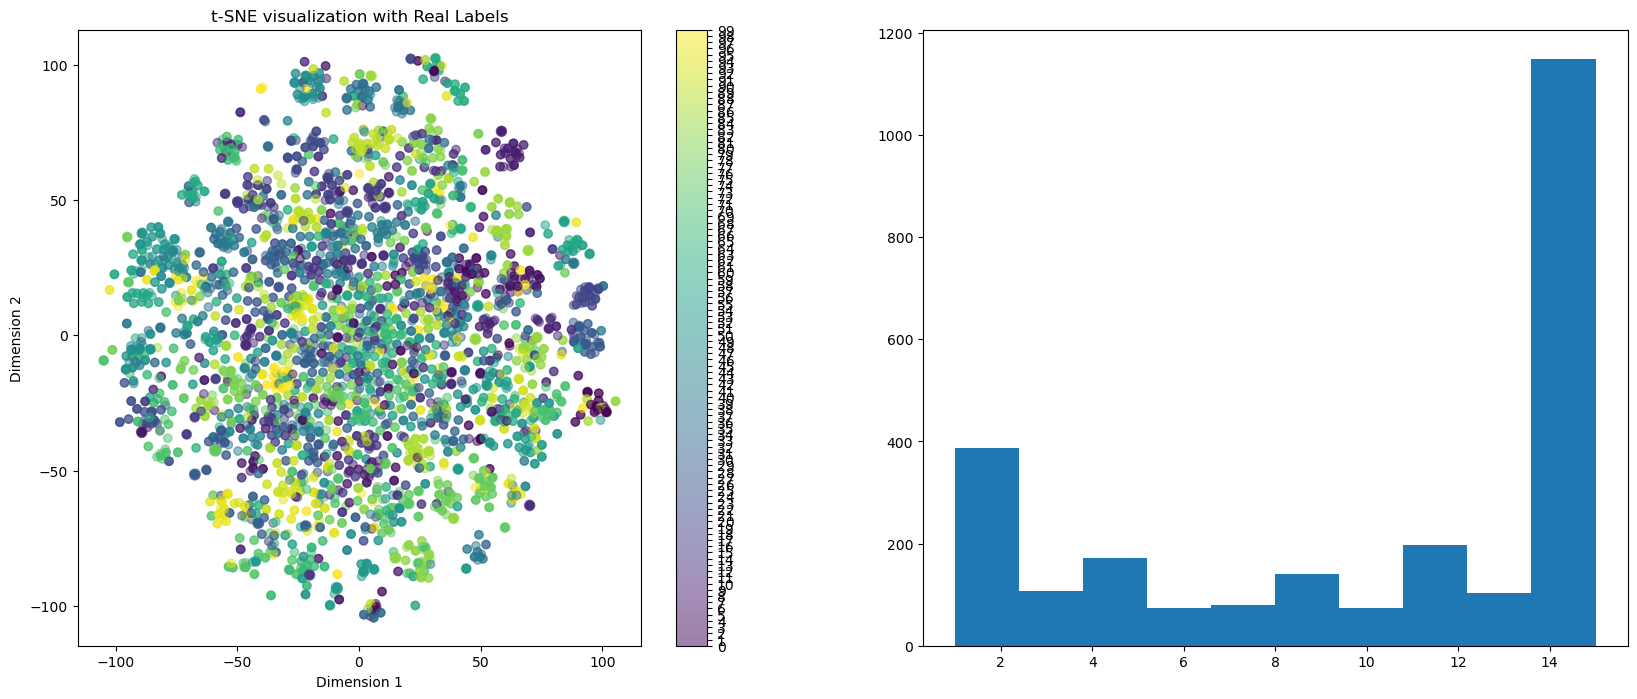

Predicted noise indices: [np.int64(142), np.int64(145), np.int64(183), np.int64(268), np.int64(283), np.int64(288), np.int64(315), np.int64(382), np.int64(413), np.int64(441), np.int64(454), np.int64(511), np.int64(526), np.int64(713), np.int64(718), np.int64(719), np.int64(767), np.int64(799), np.int64(859), np.int64(879), np.int64(938), np.int64(979), np.int64(1042), np.int64(1157), np.int64(1235), np.int64(1300), np.int64(1322), np.int64(1361), np.int64(1413), np.int64(1477), np.int64(1498), np.int64(1503), np.int64(1531), np.int64(1557), np.int64(1567), np.int64(1577), np.int64(1593), np.int64(1619), np.int64(1716), np.int64(1719), np.int64(1749), np.int64(1796), np.int64(1838), np.int64(1892), np.int64(1995), np.int64(2038), np.int64(2056), np.int64(2067), np.int64(2091), np.int64(2201), np.int64(2259), np.int64(2261), np.int64(2268), np.int64(2270), np.int64(2285), np.int64(2319), np.int64(2338), np.int64(2347), np.int64(2365), np.int64(2380), np.int64(2397), np.int64(2398), np.i

Epoch 43/1000:   4%|▍         | 44/1000 [1:58:12<42:48:21, 161.19s/it, val_loss=10.3, val_contrastive=4.5, val_accuracy=48.5, train_loss=7.73, train_contrastive=4.56, best_accuracy=51.5, best_loss=10.3] 

Early stopping triggered
Loading best model from checkpoint...


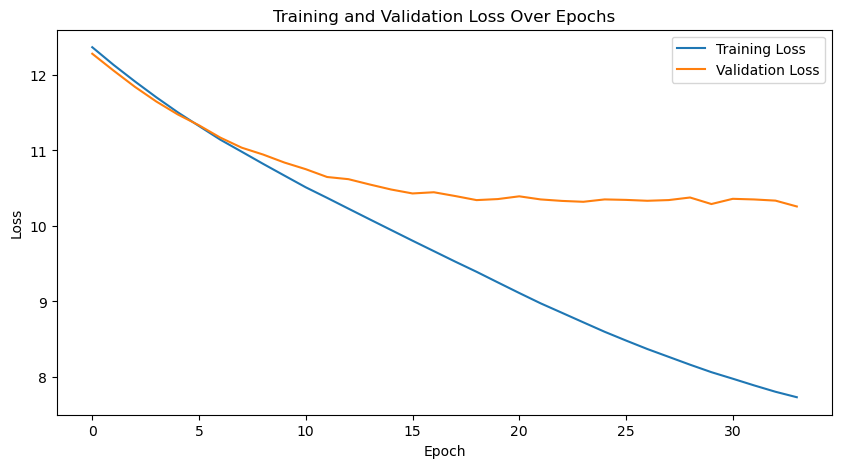

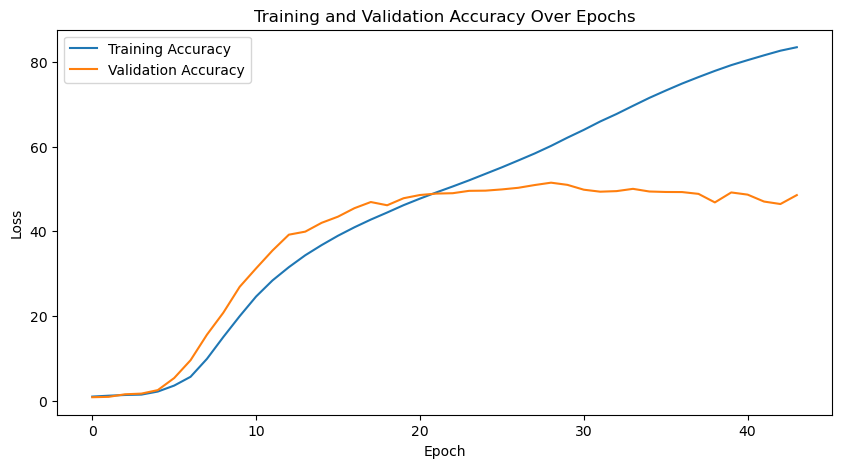

Extracting Embeddings: 100%|██████████| 35/35 [00:06<00:00,  5.82it/s]


Distance between embedding 3060 and 4123: 2.4352
Distance between embedding 3060 and 2592: 2.1405
Distance between embedding 3060 and 2088: 2.3246
Distance between embedding 3060 and 1796: 2.5523
Distance between embedding 3060 and 1937: 2.1816
Distance between embedding 3060 and 228: 1.9689
Distance between embedding 3060 and 2902: 2.0628
Distance between embedding 3060 and 254: 2.5296
Distance between embedding 3060 and 1308: 2.4532
Distance between embedding 3060 and 799: 2.5064
Distance between embedding 3060 and 4112: 2.6138
Distance between embedding 3060 and 3998: 2.4593
Distance between embedding 3060 and 3035: 1.8375
Distance between embedding 3060 and 4032: 2.0425
Distance between embedding 3060 and 3042: 2.3290
Distance between embedding 3060 and 2321: 2.1929
Distance between embedding 3060 and 3610: 2.2489
Distance between embedding 3060 and 132: 2.4110
Distance between embedding 3060 and 3618: 2.8308
Distance between embedding 4123 and 2592: 2.7056
Distance between embeddi

Testing: 100%|██████████| 35/35 [00:05<00:00,  5.93it/s]


Test Accuracy: 51.48%
Test Precision: 0.52
Test Recall: 0.51
Test F1 Score: 0.51
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/15...


Epoch 42/1000:   4%|▍         | 43/1000 [1:56:11<43:06:03, 162.14s/it, val_loss=10.2, val_contrastive=4.47, val_accuracy=48.5, train_loss=7.64, train_contrastive=4.53, best_accuracy=52.5, best_loss=10.2]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:06<00:00,  5.57it/s]


Test Accuracy: 52.51%
Test Precision: 0.53
Test Recall: 0.53
Test F1 Score: 0.52
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/15...


Epoch 40/1000:   4%|▍         | 41/1000 [1:51:32<43:28:52, 163.22s/it, val_loss=10.4, val_contrastive=4.55, val_accuracy=48, train_loss=7.8, train_contrastive=4.57, best_accuracy=50.3, best_loss=10.3]   


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:06<00:00,  5.20it/s]


Test Accuracy: 50.31%
Test Precision: 0.51
Test Recall: 0.50
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/15...


Epoch 43/1000:   4%|▍         | 44/1000 [2:00:06<43:29:40, 163.79s/it, val_loss=10.3, val_contrastive=4.54, val_accuracy=48.5, train_loss=7.65, train_contrastive=4.54, best_accuracy=51.8, best_loss=10.2]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:06<00:00,  5.30it/s]


Test Accuracy: 51.81%
Test Precision: 0.53
Test Recall: 0.52
Test F1 Score: 0.51
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/15...


Epoch 40/1000:   4%|▍         | 41/1000 [1:52:10<43:43:52, 164.16s/it, val_loss=10.4, val_contrastive=4.57, val_accuracy=47.1, train_loss=7.97, train_contrastive=4.6, best_accuracy=50.2, best_loss=10.3] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:06<00:00,  5.51it/s]


Test Accuracy: 50.25%
Test Precision: 0.51
Test Recall: 0.50
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/15...


Epoch 41/1000:   4%|▍         | 42/1000 [1:54:56<43:41:36, 164.19s/it, val_loss=10.3, val_contrastive=4.52, val_accuracy=48.1, train_loss=7.7, train_contrastive=4.55, best_accuracy=52.4, best_loss=10.2] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:07<00:00,  4.95it/s]


Test Accuracy: 52.42%
Test Precision: 0.53
Test Recall: 0.52
Test F1 Score: 0.52
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/15...


Epoch 39/1000:   4%|▍         | 40/1000 [1:49:32<43:48:58, 164.31s/it, val_loss=10.3, val_contrastive=4.54, val_accuracy=48.4, train_loss=7.92, train_contrastive=4.58, best_accuracy=51.8, best_loss=10.2]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:06<00:00,  5.31it/s]


Test Accuracy: 51.84%
Test Precision: 0.53
Test Recall: 0.52
Test F1 Score: 0.51
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/15...


Epoch 43/1000:   4%|▍         | 44/1000 [1:58:11<42:47:56, 161.17s/it, val_loss=10.3, val_contrastive=4.5, val_accuracy=46.3, train_loss=7.87, train_contrastive=4.57, best_accuracy=50.9, best_loss=10.3] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:07<00:00,  4.84it/s]


Test Accuracy: 50.90%
Test Precision: 0.53
Test Recall: 0.51
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/15...


Epoch 38/1000:   4%|▍         | 39/1000 [1:44:44<43:01:07, 161.15s/it, val_loss=10.5, val_contrastive=4.54, val_accuracy=46, train_loss=8, train_contrastive=4.6, best_accuracy=49.2, best_loss=10.4]      


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:07<00:00,  4.93it/s]


Test Accuracy: 49.17%
Test Precision: 0.51
Test Recall: 0.49
Test F1 Score: 0.49
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/15...


Epoch 39/1000:   4%|▍         | 40/1000 [1:47:39<43:03:55, 161.49s/it, val_loss=10.3, val_contrastive=4.5, val_accuracy=47.6, train_loss=7.85, train_contrastive=4.58, best_accuracy=52.3, best_loss=10.2] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:06<00:00,  5.17it/s]


Test Accuracy: 52.28%
Test Precision: 0.53
Test Recall: 0.52
Test F1 Score: 0.52
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_10.pth
Finished training fold 10
Training fold 11/15...


Epoch 47/1000:   5%|▍         | 48/1000 [2:09:31<42:48:56, 161.91s/it, val_loss=10.3, val_contrastive=4.43, val_accuracy=47.5, train_loss=7.36, train_contrastive=4.46, best_accuracy=50.7, best_loss=10.2]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:07<00:00,  4.86it/s]


Test Accuracy: 50.69%
Test Precision: 0.51
Test Recall: 0.51
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_11.pth
Finished training fold 11
Training fold 12/15...


Epoch 42/1000:   4%|▍         | 43/1000 [1:56:21<43:09:45, 162.37s/it, val_loss=10.5, val_contrastive=4.54, val_accuracy=46.4, train_loss=7.71, train_contrastive=4.55, best_accuracy=50.3, best_loss=10.4]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:07<00:00,  4.97it/s]


Test Accuracy: 50.31%
Test Precision: 0.51
Test Recall: 0.50
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_12.pth
Finished training fold 12
Training fold 13/15...


Epoch 46/1000:   5%|▍         | 47/1000 [2:07:24<43:03:18, 162.64s/it, val_loss=10.3, val_contrastive=4.51, val_accuracy=47.7, train_loss=7.63, train_contrastive=4.53, best_accuracy=50.3, best_loss=10.3]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:06<00:00,  5.05it/s]


Test Accuracy: 50.34%
Test Precision: 0.51
Test Recall: 0.50
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_13.pth
Finished training fold 13
Training fold 14/15...


Epoch 41/1000:   4%|▍         | 42/1000 [1:54:12<43:25:06, 163.16s/it, val_loss=10.3, val_contrastive=4.53, val_accuracy=48.8, train_loss=7.81, train_contrastive=4.56, best_accuracy=50.8, best_loss=10.3]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:07<00:00,  4.85it/s]


Test Accuracy: 50.78%
Test Precision: 0.51
Test Recall: 0.51
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_14.pth
Finished training fold 14
Training fold 15/15...


Epoch 44/1000:   4%|▍         | 45/1000 [2:02:37<43:22:29, 163.51s/it, val_loss=10.3, val_contrastive=4.45, val_accuracy=46.3, train_loss=7.52, train_contrastive=4.51, best_accuracy=51.2, best_loss=10.3]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:07<00:00,  4.75it/s]


Test Accuracy: 51.19%
Test Precision: 0.52
Test Recall: 0.51
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_15.pth
Finished training fold 15


Evaluating Noisy Samples: 100%|██████████| 15/15 [00:15<00:00,  1.04s/it]


33.861671469740635% relabeling accuracy


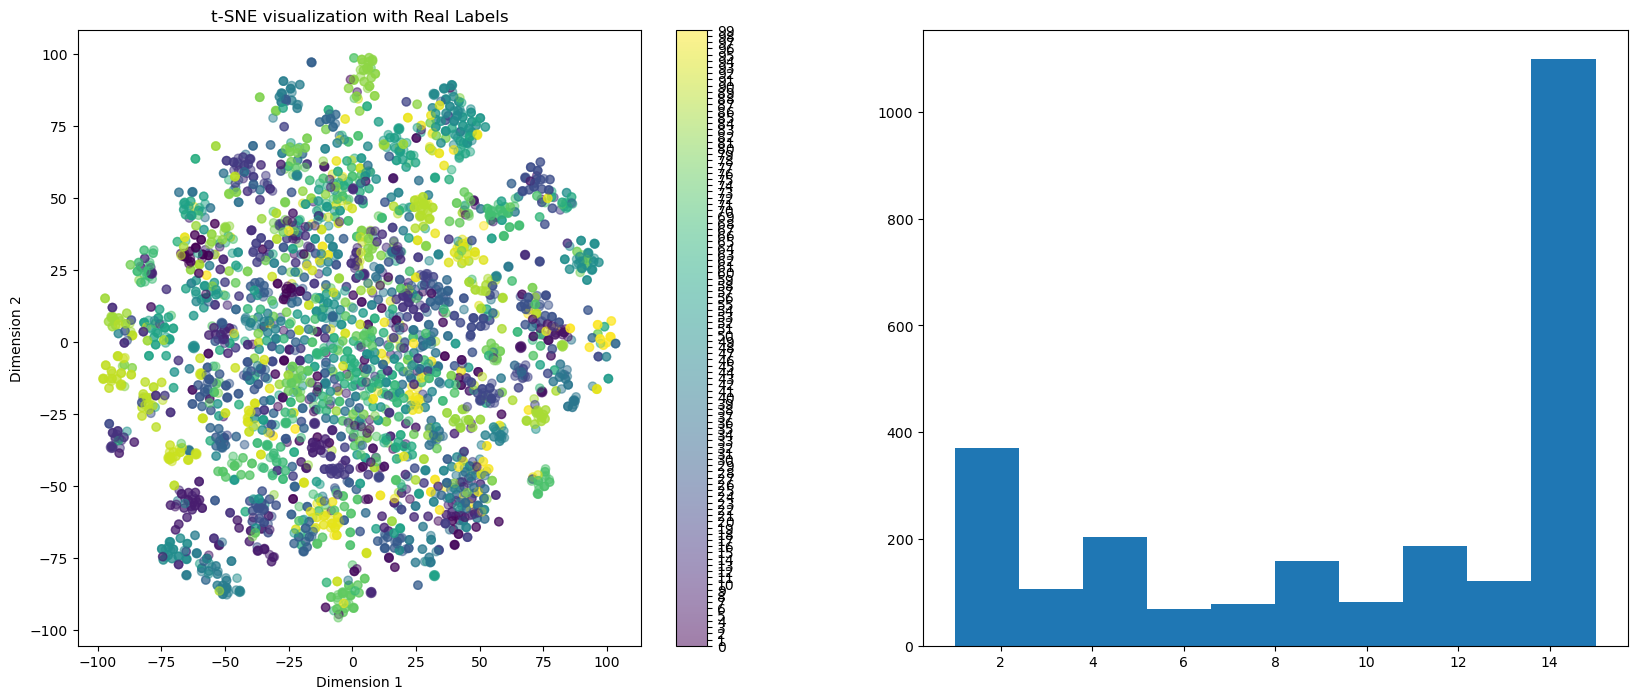

Predicted noise indices: [np.int64(27), np.int64(33), np.int64(61), np.int64(100), np.int64(136), np.int64(150), np.int64(159), np.int64(198), np.int64(258), np.int64(271), np.int64(297), np.int64(330), np.int64(400), np.int64(481), np.int64(484), np.int64(522), np.int64(595), np.int64(618), np.int64(639), np.int64(701), np.int64(722), np.int64(786), np.int64(818), np.int64(820), np.int64(871), np.int64(887), np.int64(903), np.int64(942), np.int64(970), np.int64(1000), np.int64(1075), np.int64(1108), np.int64(1120), np.int64(1121), np.int64(1137), np.int64(1176), np.int64(1220), np.int64(1272), np.int64(1344), np.int64(1420), np.int64(1456), np.int64(1522), np.int64(1545), np.int64(1633), np.int64(1763), np.int64(1775), np.int64(1829), np.int64(1863), np.int64(1880), np.int64(1937), np.int64(1983), np.int64(1985), np.int64(2036), np.int64(2039), np.int64(2045), np.int64(2079), np.int64(2149), np.int64(2194), np.int64(2214), np.int64(2240), np.int64(2288), np.int64(2358), np.int64(2361)

Epoch 40/1000:   4%|▍         | 41/1000 [1:52:51<43:59:56, 165.17s/it, val_loss=10.3, val_contrastive=4.53, val_accuracy=47.5, train_loss=7.95, train_contrastive=4.59, best_accuracy=51.8, best_loss=10.2]


Early stopping triggered
Loading best model from checkpoint...


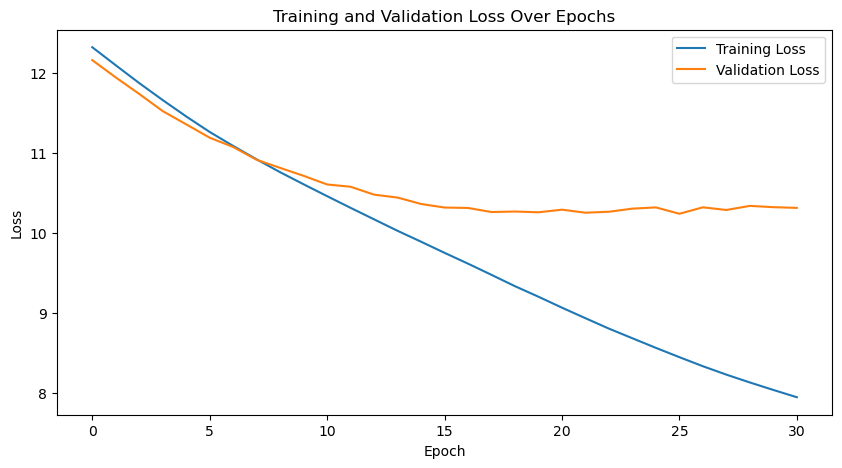

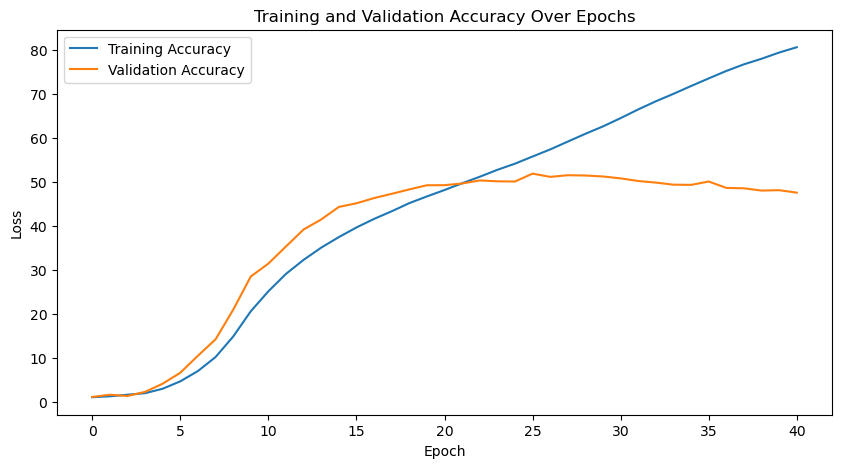

Extracting Embeddings: 100%|██████████| 35/35 [00:08<00:00,  4.32it/s]


Distance between embedding 963 and 1723: 2.3786
Distance between embedding 963 and 2120: 2.3078
Distance between embedding 963 and 4051: 2.3380
Distance between embedding 963 and 2997: 2.4639
Distance between embedding 963 and 1707: 2.2796
Distance between embedding 963 and 2669: 2.3203
Distance between embedding 963 and 1344: 2.0640
Distance between embedding 963 and 184: 2.2691
Distance between embedding 963 and 4123: 2.4708
Distance between embedding 963 and 4426: 2.3941
Distance between embedding 963 and 815: 2.3261
Distance between embedding 963 and 2466: 2.4393
Distance between embedding 963 and 2807: 2.3733
Distance between embedding 963 and 2554: 2.4145
Distance between embedding 963 and 1660: 2.4094
Distance between embedding 963 and 3030: 2.2657
Distance between embedding 963 and 2787: 2.5576
Distance between embedding 963 and 495: 2.1898
Distance between embedding 963 and 2641: 2.2868
Distance between embedding 1723 and 2120: 2.1275
Distance between embedding 1723 and 4051: 

Testing: 100%|██████████| 35/35 [00:07<00:00,  4.86it/s]


Test Accuracy: 51.81%
Test Precision: 0.52
Test Recall: 0.52
Test F1 Score: 0.51
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_1.pth
Finished training fold 1
Training fold 2/15...


Epoch 41/1000:   4%|▍         | 42/1000 [1:56:34<44:18:55, 166.53s/it, val_loss=10.4, val_contrastive=4.54, val_accuracy=48.3, train_loss=7.85, train_contrastive=4.58, best_accuracy=50.4, best_loss=10.4]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:07<00:00,  4.53it/s]


Test Accuracy: 50.43%
Test Precision: 0.51
Test Recall: 0.50
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_2.pth
Finished training fold 2
Training fold 3/15...


Epoch 37/1000:   4%|▍         | 38/1000 [1:46:07<44:46:30, 167.56s/it, val_loss=10.2, val_contrastive=4.55, val_accuracy=50, train_loss=8.05, train_contrastive=4.62, best_accuracy=51.8, best_loss=10.2]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:08<00:00,  4.12it/s]


Test Accuracy: 51.77%
Test Precision: 0.52
Test Recall: 0.52
Test F1 Score: 0.51
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_3.pth
Finished training fold 3
Training fold 4/15...


Epoch 40/1000:   4%|▍         | 41/1000 [1:54:53<44:47:11, 168.12s/it, val_loss=10.3, val_contrastive=4.57, val_accuracy=48.7, train_loss=7.89, train_contrastive=4.59, best_accuracy=50, best_loss=10.3]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:08<00:00,  4.09it/s]


Test Accuracy: 49.98%
Test Precision: 0.51
Test Recall: 0.50
Test F1 Score: 0.49
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_4.pth
Finished training fold 4
Training fold 5/15...


Epoch 38/1000:   4%|▍         | 39/1000 [1:49:28<44:57:22, 168.41s/it, val_loss=10.4, val_contrastive=4.61, val_accuracy=47.5, train_loss=7.94, train_contrastive=4.6, best_accuracy=51.6, best_loss=10.3] 


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:08<00:00,  3.91it/s]


Test Accuracy: 51.59%
Test Precision: 0.52
Test Recall: 0.52
Test F1 Score: 0.51
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_5.pth
Finished training fold 5
Training fold 6/15...


Epoch 47/1000:   5%|▍         | 48/1000 [2:15:05<44:39:21, 168.87s/it, val_loss=10.3, val_contrastive=4.44, val_accuracy=48.3, train_loss=7.39, train_contrastive=4.47, best_accuracy=51.5, best_loss=10.2]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:08<00:00,  4.15it/s]


Test Accuracy: 51.45%
Test Precision: 0.52
Test Recall: 0.51
Test F1 Score: 0.51
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_6.pth
Finished training fold 6
Training fold 7/15...


Epoch 42/1000:   4%|▍         | 43/1000 [2:01:30<45:04:06, 169.54s/it, val_loss=10.3, val_contrastive=4.55, val_accuracy=48.4, train_loss=7.83, train_contrastive=4.57, best_accuracy=51.7, best_loss=10.3]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:08<00:00,  3.90it/s]


Test Accuracy: 51.72%
Test Precision: 0.52
Test Recall: 0.52
Test F1 Score: 0.51
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_7.pth
Finished training fold 7
Training fold 8/15...


Epoch 45/1000:   5%|▍         | 46/1000 [2:09:32<44:46:39, 168.97s/it, val_loss=10.2, val_contrastive=4.55, val_accuracy=49.7, train_loss=7.57, train_contrastive=4.52, best_accuracy=52.3, best_loss=10.2]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:08<00:00,  4.31it/s]


Test Accuracy: 52.31%
Test Precision: 0.53
Test Recall: 0.52
Test F1 Score: 0.52
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_8.pth
Finished training fold 8
Training fold 9/15...


Epoch 43/1000:   4%|▍         | 44/1000 [2:04:00<44:54:24, 169.11s/it, val_loss=10.3, val_contrastive=4.55, val_accuracy=48.8, train_loss=7.53, train_contrastive=4.52, best_accuracy=53.7, best_loss=10.2]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:08<00:00,  3.97it/s]


Test Accuracy: 53.69%
Test Precision: 0.55
Test Recall: 0.54
Test F1 Score: 0.53
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_9.pth
Finished training fold 9
Training fold 10/15...


Epoch 43/1000:   4%|▍         | 44/1000 [2:04:01<44:54:41, 169.12s/it, val_loss=10.3, val_contrastive=4.48, val_accuracy=47.2, train_loss=7.81, train_contrastive=4.56, best_accuracy=50.8, best_loss=10.3]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:08<00:00,  4.15it/s]


Test Accuracy: 50.78%
Test Precision: 0.52
Test Recall: 0.51
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_10.pth
Finished training fold 10
Training fold 11/15...


Epoch 45/1000:   5%|▍         | 46/1000 [2:09:53<44:53:49, 169.42s/it, val_loss=10.2, val_contrastive=4.46, val_accuracy=49.2, train_loss=7.52, train_contrastive=4.51, best_accuracy=53.2, best_loss=10.2]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:08<00:00,  4.14it/s]


Test Accuracy: 53.20%
Test Precision: 0.54
Test Recall: 0.53
Test F1 Score: 0.53
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_11.pth
Finished training fold 11
Training fold 12/15...


Epoch 39/1000:   4%|▍         | 40/1000 [1:52:48<45:07:30, 169.22s/it, val_loss=10.5, val_contrastive=4.57, val_accuracy=47.8, train_loss=8.11, train_contrastive=4.62, best_accuracy=48.6, best_loss=10.4]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:08<00:00,  3.89it/s]


Test Accuracy: 48.61%
Test Precision: 0.49
Test Recall: 0.49
Test F1 Score: 0.48
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_12.pth
Finished training fold 12
Training fold 13/15...


Epoch 42/1000:   4%|▍         | 43/1000 [2:01:21<45:01:03, 169.35s/it, val_loss=10.4, val_contrastive=4.57, val_accuracy=47.9, train_loss=7.93, train_contrastive=4.59, best_accuracy=51.2, best_loss=10.4]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:08<00:00,  4.04it/s]


Test Accuracy: 51.23%
Test Precision: 0.52
Test Recall: 0.51
Test F1 Score: 0.51
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_13.pth
Finished training fold 13
Training fold 14/15...


Epoch 40/1000:   4%|▍         | 41/1000 [1:55:40<45:05:30, 169.27s/it, val_loss=10.3, val_contrastive=4.58, val_accuracy=48.7, train_loss=7.91, train_contrastive=4.59, best_accuracy=50.6, best_loss=10.2]


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:08<00:00,  4.07it/s]


Test Accuracy: 50.63%
Test Precision: 0.52
Test Recall: 0.51
Test F1 Score: 0.50
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_14.pth
Finished training fold 14
Training fold 15/15...


Epoch 44/1000:   4%|▍         | 45/1000 [2:07:13<45:00:02, 169.64s/it, val_loss=10.5, val_contrastive=4.54, val_accuracy=46.7, train_loss=7.71, train_contrastive=4.54, best_accuracy=50, best_loss=10.4]  


Early stopping triggered
Loading best model from checkpoint...


Testing: 100%|██████████| 35/35 [00:09<00:00,  3.89it/s]


Test Accuracy: 49.96%
Test Precision: 0.51
Test Recall: 0.50
Test F1 Score: 0.49
Model saved to cifar100(128)(20)/resnet50/model_resnet50_cifar10_fold_15.pth
Finished training fold 15


Evaluating Noisy Samples: 100%|██████████| 15/15 [00:15<00:00,  1.00s/it]


38.526315789473685% relabeling accuracy


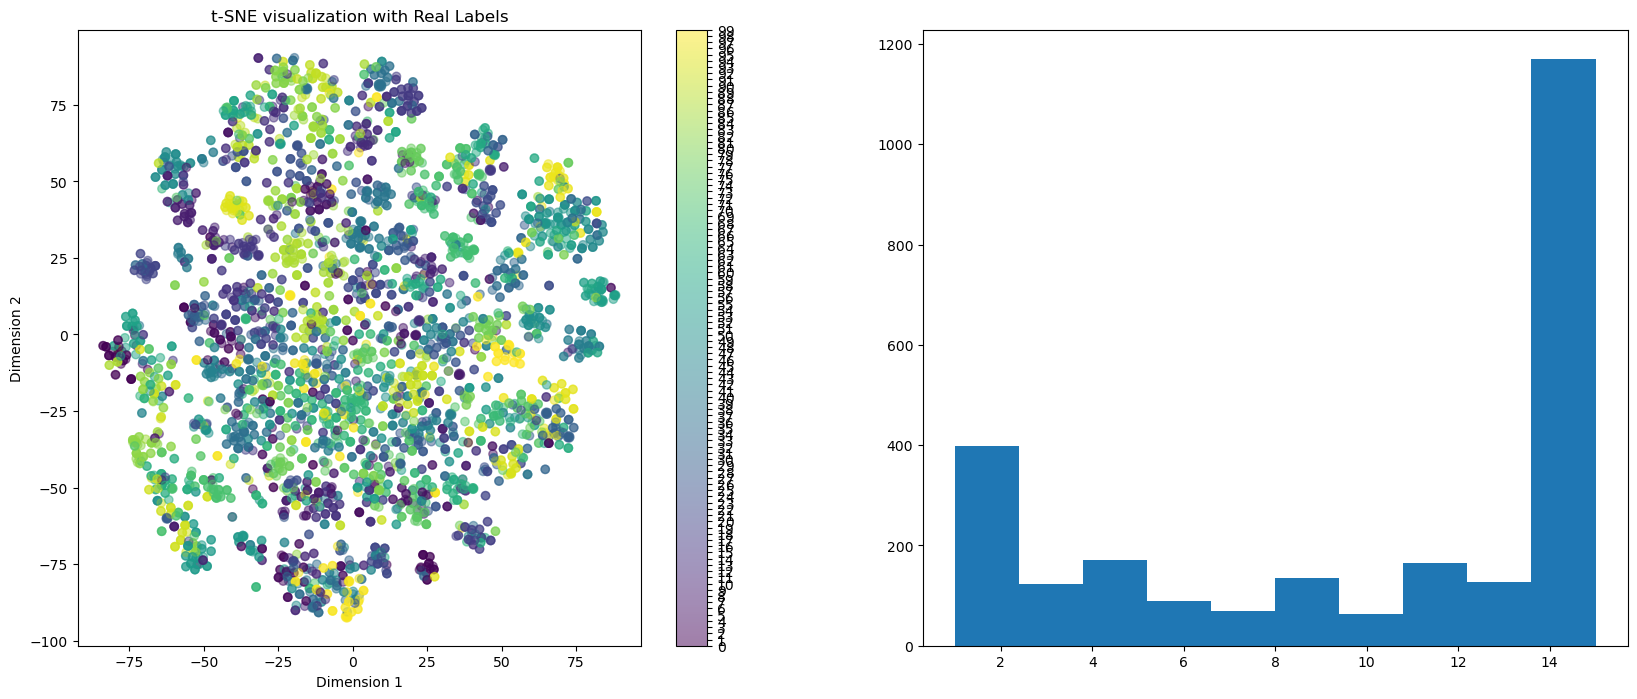

Predicted noise indices: [np.int64(8), np.int64(20), np.int64(28), np.int64(31), np.int64(137), np.int64(151), np.int64(153), np.int64(193), np.int64(197), np.int64(205), np.int64(213), np.int64(254), np.int64(317), np.int64(342), np.int64(354), np.int64(377), np.int64(407), np.int64(410), np.int64(483), np.int64(510), np.int64(535), np.int64(576), np.int64(580), np.int64(586), np.int64(588), np.int64(626), np.int64(641), np.int64(746), np.int64(748), np.int64(751), np.int64(780), np.int64(809), np.int64(980), np.int64(1011), np.int64(1055), np.int64(1127), np.int64(1204), np.int64(1243), np.int64(1253), np.int64(1269), np.int64(1302), np.int64(1343), np.int64(1355), np.int64(1368), np.int64(1487), np.int64(1530), np.int64(1570), np.int64(1642), np.int64(1655), np.int64(1679), np.int64(1701), np.int64(1761), np.int64(1762), np.int64(1820), np.int64(1823), np.int64(1851), np.int64(1859), np.int64(1895), np.int64(1941), np.int64(1962), np.int64(2027), np.int64(2029), np.int64(2032), np.i

Epoch 5/1000:   0%|          | 5/1000 [14:30<47:51:04, 173.13s/it, val_loss=13.1, val_contrastive=4.12, val_accuracy=5.66, train_loss=13.2, train_contrastive=4.07, best_accuracy=5.66, best_loss=13.1]

In [ ]:
noise_cleaner.clean()